# Return számolás

In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm

In [4]:
px_last=pd.read_excel(r"C:\Users\demet\Desktop\Python\adat\faktorok 8-10.xlsx", sheet_name="px_last 2016", index_col=0)
dividend=pd.read_excel(r"C:\Users\demet\Desktop\Python\adat\faktorok 8-10.xlsx", sheet_name="div 2016", index_col=0)
rfree=pd.read_excel(r"C:\Users\demet\Desktop\Python\adat\faktorok 8-10.xlsx", sheet_name="rf 2016", index_col=0)

In [5]:
px_last.replace(0, np.nan, inplace=True)

In [6]:
#napi rf, es ne %-ban legyen, hanem tizedes tortben
rf=(rfree/100)/365
rf

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Dates,,,,,,,,,,,,,,,,,,,,,
2016-01-04,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061,...,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061
2016-01-05,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061,...,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061
2016-01-06,0.000059,0.000059,0.000059,0.000059,0.000059,0.000059,0.000059,0.000059,0.000059,0.000059,...,0.000059,0.000059,0.000059,0.000059,0.000059,0.000059,0.000059,0.000059,0.000059,0.000059
2016-01-07,0.000059,0.000059,0.000059,0.000059,0.000059,0.000059,0.000059,0.000059,0.000059,0.000059,...,0.000059,0.000059,0.000059,0.000059,0.000059,0.000059,0.000059,0.000059,0.000059,0.000059
2016-01-08,0.000058,0.000058,0.000058,0.000058,0.000058,0.000058,0.000058,0.000058,0.000058,0.000058,...,0.000058,0.000058,0.000058,0.000058,0.000058,0.000058,0.000058,0.000058,0.000058,0.000058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26,0.000107,0.000107,0.000107,0.000107,0.000107,0.000107,0.000107,0.000107,0.000107,0.000107,...,0.000107,0.000107,0.000107,0.000107,0.000107,0.000107,0.000107,0.000107,0.000107,0.000107
2023-12-27,0.000104,0.000104,0.000104,0.000104,0.000104,0.000104,0.000104,0.000104,0.000104,0.000104,...,0.000104,0.000104,0.000104,0.000104,0.000104,0.000104,0.000104,0.000104,0.000104,0.000104
2023-12-28,0.000105,0.000105,0.000105,0.000105,0.000105,0.000105,0.000105,0.000105,0.000105,0.000105,...,0.000105,0.000105,0.000105,0.000105,0.000105,0.000105,0.000105,0.000105,0.000105,0.000105


In [7]:
r = px_last+dividend
eredmeny=(r/r.shift(1))
eredmeny

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Dates,,,,,,,,,,,,,,,,,,,,,
2016-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,0.996559,0.990467,0.974941,0.995834,NaN,0.999767,1.003630,1.005205,1.004023,0.992652,...,1.018904,1.010084,1.008521,1.020387,0.999723,0.997508,1.020824,0.974883,0.989143,1.015655
2016-01-06,1.004439,1.017522,0.980411,1.000174,NaN,0.991612,1.001593,0.998046,0.985705,0.957439,...,0.948195,1.010538,0.991679,0.985514,0.987524,0.992918,1.004329,0.960043,0.970855,1.000208
2016-01-07,0.957525,0.981082,0.957815,0.997037,NaN,0.976034,0.998990,0.970634,0.979016,0.974488,...,0.905930,1.003842,0.983994,0.991215,0.974172,0.965885,0.977007,0.954684,0.969980,0.969596
2016-01-08,0.989487,0.998022,1.005267,0.972732,NaN,0.979056,0.989586,0.990319,0.985860,0.991273,...,0.959296,0.989065,0.979798,0.971365,0.990490,0.986391,0.995784,0.997307,0.988746,0.985395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26,1.001720,0.986024,0.997159,0.997935,0.985227,1.001834,0.995531,0.997122,0.999182,1.008980,...,1.006415,1.003062,1.002257,1.009086,1.008700,1.002000,1.007133,1.022605,1.020000,1.002667
2023-12-27,1.000072,0.991495,1.000518,1.001682,0.984357,1.005127,1.000408,1.001103,0.996356,1.002414,...,0.995934,0.988594,0.995301,1.002532,1.006689,1.004453,0.997612,1.001053,0.991756,1.007161
2023-12-28,0.999642,0.999285,1.002226,0.999161,1.003295,1.005556,1.007071,0.993697,0.999061,1.004465,...,1.012468,1.005687,0.985540,0.998877,0.999475,0.997554,1.004128,0.998405,1.003370,1.001320


In [8]:
#loghozam szamolas
hozam = eredmeny.applymap(lambda x: np.log(x) if not pd.isna(x) and x > 0 else np.nan)
hozam

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Dates,,,,,,,,,,,,,,,,,,,,,
2016-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,-0.003447,-0.009579,-0.025378,-0.004175,NaN,-0.000233,0.003623,0.005191,0.004015,-0.007375,...,0.018727,0.010034,0.008484,0.020182,-0.000277,-0.002495,0.020610,-0.025437,-0.010917,0.015533
2016-01-06,0.004429,0.017370,-0.019783,0.000174,NaN,-0.008423,0.001592,-0.001956,-0.014398,-0.043493,...,-0.053195,0.010483,-0.008355,-0.014591,-0.012554,-0.007107,0.004320,-0.040777,-0.029578,0.000208
2016-01-07,-0.043403,-0.019100,-0.043100,-0.002967,NaN,-0.024258,-0.001010,-0.029806,-0.021208,-0.025843,...,-0.098793,0.003835,-0.016136,-0.008824,-0.026168,-0.034710,-0.023261,-0.046375,-0.030479,-0.030876
2016-01-08,-0.010568,-0.001980,0.005253,-0.027647,NaN,-0.021166,-0.010468,-0.009728,-0.014241,-0.008765,...,-0.041556,-0.010995,-0.020409,-0.029053,-0.009556,-0.013703,-0.004225,-0.002697,-0.011318,-0.014713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26,0.001718,-0.014075,-0.002845,-0.002067,-0.014883,0.001833,-0.004479,-0.002882,-0.000819,0.008940,...,0.006394,0.003057,0.002254,0.009045,0.008663,0.001998,0.007108,0.022353,0.019803,0.002663
2023-12-27,0.000072,-0.008541,0.000518,0.001680,-0.015767,0.005114,0.000408,0.001103,-0.003651,0.002411,...,-0.004074,-0.011471,-0.004711,0.002529,0.006667,0.004443,-0.002391,0.001052,-0.008278,0.007136
2023-12-28,-0.000358,-0.000715,0.002224,-0.000840,0.003290,0.005541,0.007046,-0.006323,-0.000940,0.004455,...,0.012391,0.005671,-0.014566,-0.001123,-0.000525,-0.002449,0.004119,-0.001597,0.003364,0.001320


In [9]:
#excess return
hozam=hozam-rf
hozam

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Dates,,,,,,,,,,,,,,,,,,,,,
2016-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,-0.003508,-0.009640,-0.025439,-0.004236,NaN,-0.000294,0.003562,0.005130,0.003954,-0.007436,...,0.018666,0.009972,0.008423,0.020121,-0.000338,-0.002557,0.020548,-0.025499,-0.010978,0.015472
2016-01-06,0.004370,0.017311,-0.019843,0.000115,NaN,-0.008483,0.001533,-0.002015,-0.014458,-0.043553,...,-0.053255,0.010423,-0.008415,-0.014651,-0.012614,-0.007167,0.004260,-0.040836,-0.029637,0.000149
2016-01-07,-0.043462,-0.019158,-0.043159,-0.003026,NaN,-0.024317,-0.001069,-0.029864,-0.021266,-0.025902,...,-0.098852,0.003776,-0.016194,-0.008883,-0.026226,-0.034769,-0.023320,-0.046433,-0.030538,-0.030935
2016-01-08,-0.010626,-0.002038,0.005195,-0.027705,NaN,-0.021224,-0.010526,-0.009786,-0.014299,-0.008823,...,-0.041614,-0.011053,-0.020467,-0.029111,-0.009614,-0.013761,-0.004283,-0.002755,-0.011376,-0.014770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26,0.001611,-0.014182,-0.002952,-0.002174,-0.014990,0.001726,-0.004586,-0.002989,-0.000925,0.008833,...,0.006287,0.002950,0.002148,0.008938,0.008556,0.001891,0.007001,0.022246,0.019696,0.002557
2023-12-27,-0.000032,-0.008645,0.000414,0.001576,-0.015871,0.005010,0.000304,0.000999,-0.003755,0.002307,...,-0.004178,-0.011575,-0.004814,0.002425,0.006563,0.004339,-0.002495,0.000948,-0.008382,0.007032
2023-12-28,-0.000463,-0.000820,0.002118,-0.000945,0.003185,0.005435,0.006941,-0.006428,-0.001045,0.004349,...,0.012286,0.005566,-0.014671,-0.001229,-0.000630,-0.002554,0.004014,-0.001702,0.003259,0.001214


In [10]:
#NaN sor eltávolítása
hozam = hozam.drop(hozam.index[0])
hozam

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Dates,,,,,,,,,,,,,,,,,,,,,
2016-01-05,-0.003508,-0.009640,-0.025439,-0.004236,NaN,-0.000294,0.003562,0.005130,0.003954,-0.007436,...,0.018666,0.009972,0.008423,0.020121,-0.000338,-0.002557,0.020548,-0.025499,-0.010978,0.015472
2016-01-06,0.004370,0.017311,-0.019843,0.000115,NaN,-0.008483,0.001533,-0.002015,-0.014458,-0.043553,...,-0.053255,0.010423,-0.008415,-0.014651,-0.012614,-0.007167,0.004260,-0.040836,-0.029637,0.000149
2016-01-07,-0.043462,-0.019158,-0.043159,-0.003026,NaN,-0.024317,-0.001069,-0.029864,-0.021266,-0.025902,...,-0.098852,0.003776,-0.016194,-0.008883,-0.026226,-0.034769,-0.023320,-0.046433,-0.030538,-0.030935
2016-01-08,-0.010626,-0.002038,0.005195,-0.027705,NaN,-0.021224,-0.010526,-0.009786,-0.014299,-0.008823,...,-0.041614,-0.011053,-0.020467,-0.029111,-0.009614,-0.013761,-0.004283,-0.002755,-0.011376,-0.014770
2016-01-11,-0.017047,0.017375,0.016023,-0.032382,NaN,0.001415,-0.002109,0.010375,0.017207,0.023471,...,-0.016650,0.007924,-0.013539,-0.019729,-0.008533,-0.001820,-0.017443,-0.006664,-0.020179,-0.028804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26,0.001611,-0.014182,-0.002952,-0.002174,-0.014990,0.001726,-0.004586,-0.002989,-0.000925,0.008833,...,0.006287,0.002950,0.002148,0.008938,0.008556,0.001891,0.007001,0.022246,0.019696,0.002557
2023-12-27,-0.000032,-0.008645,0.000414,0.001576,-0.015871,0.005010,0.000304,0.000999,-0.003755,0.002307,...,-0.004178,-0.011575,-0.004814,0.002425,0.006563,0.004339,-0.002495,0.000948,-0.008382,0.007032
2023-12-28,-0.000463,-0.000820,0.002118,-0.000945,0.003185,0.005435,0.006941,-0.006428,-0.001045,0.004349,...,0.012286,0.005566,-0.014671,-0.001229,-0.000630,-0.002554,0.004014,-0.001702,0.003259,0.001214


In [11]:
hozam.replace([np.inf, -np.inf], 0, inplace=True)
hozam=hozam.fillna(0)
hozam

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Dates,,,,,,,,,,,,,,,,,,,,,
2016-01-05,-0.003508,-0.009640,-0.025439,-0.004236,0.000000,-0.000294,0.003562,0.005130,0.003954,-0.007436,...,0.018666,0.009972,0.008423,0.020121,-0.000338,-0.002557,0.020548,-0.025499,-0.010978,0.015472
2016-01-06,0.004370,0.017311,-0.019843,0.000115,0.000000,-0.008483,0.001533,-0.002015,-0.014458,-0.043553,...,-0.053255,0.010423,-0.008415,-0.014651,-0.012614,-0.007167,0.004260,-0.040836,-0.029637,0.000149
2016-01-07,-0.043462,-0.019158,-0.043159,-0.003026,0.000000,-0.024317,-0.001069,-0.029864,-0.021266,-0.025902,...,-0.098852,0.003776,-0.016194,-0.008883,-0.026226,-0.034769,-0.023320,-0.046433,-0.030538,-0.030935
2016-01-08,-0.010626,-0.002038,0.005195,-0.027705,0.000000,-0.021224,-0.010526,-0.009786,-0.014299,-0.008823,...,-0.041614,-0.011053,-0.020467,-0.029111,-0.009614,-0.013761,-0.004283,-0.002755,-0.011376,-0.014770
2016-01-11,-0.017047,0.017375,0.016023,-0.032382,0.000000,0.001415,-0.002109,0.010375,0.017207,0.023471,...,-0.016650,0.007924,-0.013539,-0.019729,-0.008533,-0.001820,-0.017443,-0.006664,-0.020179,-0.028804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26,0.001611,-0.014182,-0.002952,-0.002174,-0.014990,0.001726,-0.004586,-0.002989,-0.000925,0.008833,...,0.006287,0.002950,0.002148,0.008938,0.008556,0.001891,0.007001,0.022246,0.019696,0.002557
2023-12-27,-0.000032,-0.008645,0.000414,0.001576,-0.015871,0.005010,0.000304,0.000999,-0.003755,0.002307,...,-0.004178,-0.011575,-0.004814,0.002425,0.006563,0.004339,-0.002495,0.000948,-0.008382,0.007032
2023-12-28,-0.000463,-0.000820,0.002118,-0.000945,0.003185,0.005435,0.006941,-0.006428,-0.001045,0.004349,...,0.012286,0.005566,-0.014671,-0.001229,-0.000630,-0.002554,0.004014,-0.001702,0.003259,0.001214


In [12]:
r_i=hozam.iloc[1761:2012]
r_i

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Dates,,,,,,,,,,,,,,,,,,,,,
2023-01-03,0.002500,0.001469,-0.036387,0.013724,-0.007145,0.002626,-0.005213,0.012633,0.001056,-0.009782,...,0.037265,0.006260,-0.026560,0.030060,0.004319,-0.004406,0.000054,0.014570,-0.006019,0.004493
2023-01-04,0.010704,0.064487,0.008323,-0.001139,0.043910,0.010021,0.004850,-0.003511,0.013138,0.020974,...,0.059857,0.001492,-0.005702,0.028882,-0.004342,0.008876,0.007243,0.010565,0.027348,0.011615
2023-01-05,0.002795,0.028907,-0.010763,-0.001324,-0.011551,-0.003795,0.002603,-0.023998,-0.038832,-0.038313,...,0.004727,-0.020544,0.022026,-0.020740,-0.028906,-0.007747,-0.018803,-0.011306,-0.017777,-0.023947
2023-01-06,-0.029721,0.013392,0.036036,0.018446,0.009095,0.013617,0.015040,0.023316,0.012940,0.035760,...,0.024024,0.029080,0.011917,0.010125,0.034837,0.019981,-0.003116,0.049999,0.037875,0.014847
2023-01-09,-0.001452,0.029777,0.003984,-0.029897,0.008004,-0.001700,-0.019533,0.016627,0.027264,0.009404,...,0.007993,0.009535,-0.018910,-0.013346,0.004566,-0.004173,0.002684,0.021145,-0.004790,-0.004033
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26,0.001611,-0.014182,-0.002952,-0.002174,-0.014990,0.001726,-0.004586,-0.002989,-0.000925,0.008833,...,0.006287,0.002950,0.002148,0.008938,0.008556,0.001891,0.007001,0.022246,0.019696,0.002557
2023-12-27,-0.000032,-0.008645,0.000414,0.001576,-0.015871,0.005010,0.000304,0.000999,-0.003755,0.002307,...,-0.004178,-0.011575,-0.004814,0.002425,0.006563,0.004339,-0.002495,0.000948,-0.008382,0.007032
2023-12-28,-0.000463,-0.000820,0.002118,-0.000945,0.003185,0.005435,0.006941,-0.006428,-0.001045,0.004349,...,0.012286,0.005566,-0.014671,-0.001229,-0.000630,-0.002554,0.004014,-0.001702,0.003259,0.001214


In [13]:
#kummulált loghozam
kummhozam=r_i.sum()
kummhozam

A      -0.102854
AAL     0.027831
AAPL    0.330877
ABBV   -0.028715
ABNB    0.425671
          ...   
YUM    -0.015161
ZBH    -0.074361
ZBRA    0.016906
ZION   -0.125697
ZTS     0.268619
Length: 503, dtype: float64

<Axes: ylabel='Frequency'>

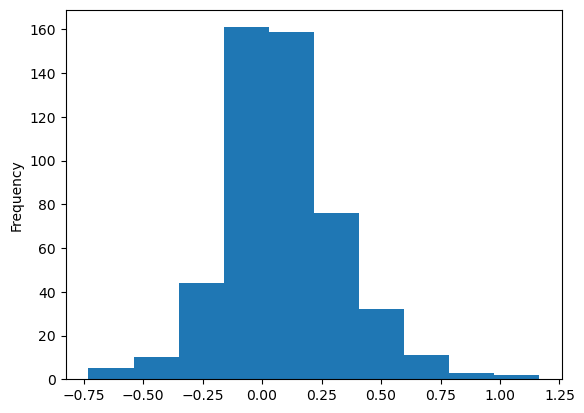

In [14]:
kummhozam.plot.hist()

# GICS classification

### GICS map beolvasása

In [15]:
gics = pd.read_excel(r"C:\Users\demet\Desktop\Python\adat\gics-map-2024.xlsx")
gics[gics["SubIndustry"] == "Food Retail"]

,SectorId,Sector,IndustryGroupId,IndustryGroup,IndustryId,Industry,SubIndustryId,SubIndustry,SubIndustryDescription,Unnamed: 9
80,30,Consumer Staples,3010,Consumer Staples Distribution & Retail,301010,Consumer Staples Distribution & Retail,30101030,Food Retail,Owners and operators of primarily food retail ...,NaN


### Wikipédia beolvasása

In [535]:
# Import Packages
import bs4 as bs
import requests 
import pandas as pd
import re

wiki_url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"

def get_sp500_tickers():
  resp = requests.get(wiki_url)
  soup = bs.BeautifulSoup(resp.text, "lxml")
  table = soup.find('table', {'id': 'constituents'})
  tickers = []
  for row in table.findAll('tr')[1:]:
    #print(row.find_all('a'))
    
    ticker = [t.text.strip() for t in row.find_all('td')]
    for link in row.findAll('a'):
        ticker.append(link.get('href'))
    tickers.append(ticker)
   
  return tickers


data = get_sp500_tickers()

# Keep only 14 columns
data = [row[0:13] for row in data]

# Create Pandas dataframe
columns = ["Ticker", "CompanyName", "Sector", "SubIndustry", "Reports", "HQLocation", "DateFirstAdded", "CIK", "FoundedYear", "QuoteURL", "WikiPage", "EDGARURL", "HQLocationWikiPage"]
df = pd.DataFrame(data=data, columns=columns)

#print(len(df))
#print(df)

### GICS map és Wikipédia összefűzése

In [536]:
# Add gics code column
gics_df = pd.DataFrame()
for i in range(0, len(df)):
    gics_row = gics[gics["SubIndustry"] == df.loc[i,"SubIndustry"]]
    #if len(gics_row) != 1:
     #   print(f"**** Error in index {i}\n\n", df.loc[i])
    gics_df = pd.concat([gics_df, gics_row], ignore_index=True)


for col in gics_df.columns:
    columns.append(col)
    
#columns

sp500_df=pd.concat([df, gics_df], axis=1)
sp500_df=sp500_df.drop("Reports", axis=1)
sp500_df=sp500_df.drop("HQLocation", axis=1)
sp500_df=sp500_df.drop("DateFirstAdded", axis=1)
sp500_df=sp500_df.drop("CIK", axis=1)
sp500_df=sp500_df.drop("FoundedYear", axis=1)
sp500_df=sp500_df.drop("QuoteURL", axis=1)
sp500_df=sp500_df.drop("WikiPage", axis=1)
sp500_df=sp500_df.drop("EDGARURL", axis=1)
sp500_df=sp500_df.drop("HQLocationWikiPage", axis=1)
sp500_df=sp500_df.drop("Unnamed: 9", axis=1)
sp500_df=sp500_df.drop("SubIndustryDescription", axis=1)


sp500_df

#sp500_df.to_csv('sp500gics.csv', index = True) 
#sp500_df.to_excel('sp500gicsexcel.xlsx', index = True) 

,Ticker,CompanyName,Sector,SubIndustry,SectorId,Sector,IndustryGroupId,IndustryGroup,IndustryId,Industry,SubIndustryId,SubIndustry
0,MMM,3M,Industrials,Industrial Conglomerates,20.0,Industrials,2010.0,Capital Goods,201050.0,Industrial Conglomerates,20105010.0,Industrial Conglomerates
1,AOS,A. O. Smith,Industrials,Building Products,20.0,Industrials,2010.0,Capital Goods,201020.0,Building Products,20102010.0,Building Products
2,ABT,Abbott,Health Care,Health Care Equipment,35.0,Health Care,3510.0,Health Care Equipment & Services,351010.0,Health Care Equipment & Supplies,35101010.0,Health Care Equipment
3,ABBV,AbbVie,Health Care,Biotechnology,35.0,Health Care,3520.0,"Pharmaceuticals, Biotechnology & Life Sciences",352010.0,Biotechnology,35201010.0,Biotechnology
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,45.0,Information Technology,4510.0,Software & Services,451020.0,IT Services,45102010.0,IT Consulting & Other Services
...,...,...,...,...,...,...,...,...,...,...,...,...
498,XYL,Xylem Inc.,Industrials,Industrial Machinery & Supplies & Components,25.0,Consumer Discretionary,2530.0,Consumer Services,253010.0,"Hotels, Restaurants & Leisure",25301040.0,Restaurants
499,YUM,Yum! Brands,Consumer Discretionary,Restaurants,45.0,Information Technology,4520.0,Technology Hardware & Equipment,452030.0,"Electronic Equipment, Instruments & Components",45203010.0,Electronic Equipment & Instruments
500,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,35.0,Health Care,3510.0,Health Care Equipment & Services,351010.0,Health Care Equipment & Supplies,35101010.0,Health Care Equipment
501,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,35.0,Health Care,3520.0,"Pharmaceuticals, Biotechnology & Life Sciences",352020.0,Pharmaceuticals,35202010.0,Pharmaceuticals


### 0-1 mátrix

In [18]:
#lementettem az adatletoltessel egyidoben, hogyha valtozik a wikipedian az sp500 osszetetel, akkor ne legyen belole problema
matrix=pd.read_excel(r"C:\Users\demet\Desktop\Python\adat\sp500gicsexcel.xlsx", sheet_name="Sheet1", index_col=0)
matrix

,Ticker,CompanyName,Sector,SubIndustry,SectorId,Sector.1,IndustryGroupId,IndustryGroup,IndustryId,Industry,SubIndustryId,SubIndustry.1
0,MMM,3M,Industrials,Industrial Conglomerates,20,Industrials,2010,Capital Goods,201050,Industrial Conglomerates,20105010,Industrial Conglomerates
1,AOS,A. O. Smith,Industrials,Building Products,20,Industrials,2010,Capital Goods,201020,Building Products,20102010,Building Products
2,ABT,Abbott,Health Care,Health Care Equipment,35,Health Care,3510,Health Care Equipment & Services,351010,Health Care Equipment & Supplies,35101010,Health Care Equipment
3,ABBV,AbbVie,Health Care,Biotechnology,35,Health Care,3520,"Pharmaceuticals, Biotechnology & Life Sciences",352010,Biotechnology,35201010,Biotechnology
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,45,Information Technology,4510,Software & Services,451020,IT Services,45102010,IT Consulting & Other Services
...,...,...,...,...,...,...,...,...,...,...,...,...
498,YUM,Yum! Brands,Consumer Discretionary,Restaurants,25,Consumer Discretionary,2530,Consumer Services,253010,"Hotels, Restaurants & Leisure",25301040,Restaurants
499,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,45,Information Technology,4520,Technology Hardware & Equipment,452030,"Electronic Equipment, Instruments & Components",45203010,Electronic Equipment & Instruments
500,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,35,Health Care,3510,Health Care Equipment & Services,351010,Health Care Equipment & Supplies,35101010,Health Care Equipment
501,ZION,Zions Bancorporation,Financials,Regional Banks,40,Financials,4010,Banks,401010,Banks,40101015,Regional Banks


In [19]:
matrix = pd.crosstab(index=matrix['Ticker'], columns=matrix['SectorId'])
matrix

SectorId,10,15,20,25,30,35,40,45,50,55,60
Ticker,,,,,,,,,,,
A,0,0,0,0,0,1,0,0,0,0,0
AAL,0,0,1,0,0,0,0,0,0,0,0
AAPL,0,0,0,0,0,0,0,1,0,0,0
ABBV,0,0,0,0,0,1,0,0,0,0,0
ABNB,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
YUM,0,0,0,1,0,0,0,0,0,0,0
ZBH,0,0,0,0,0,1,0,0,0,0,0
ZBRA,0,0,0,0,0,0,0,1,0,0,0


In [20]:
#hany db ceg tartozik egy-egy sectorba
elo=matrix.sum()
elo

SectorId
10    23
15    28
20    78
25    53
30    38
35    64
40    72
45    64
50    22
55    30
60    31
dtype: int64

# FAKTOROK KISZÁMOLÁSA

### Momentum

In [21]:
hozam

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Dates,,,,,,,,,,,,,,,,,,,,,
2016-01-05,-0.003508,-0.009640,-0.025439,-0.004236,0.000000,-0.000294,0.003562,0.005130,0.003954,-0.007436,...,0.018666,0.009972,0.008423,0.020121,-0.000338,-0.002557,0.020548,-0.025499,-0.010978,0.015472
2016-01-06,0.004370,0.017311,-0.019843,0.000115,0.000000,-0.008483,0.001533,-0.002015,-0.014458,-0.043553,...,-0.053255,0.010423,-0.008415,-0.014651,-0.012614,-0.007167,0.004260,-0.040836,-0.029637,0.000149
2016-01-07,-0.043462,-0.019158,-0.043159,-0.003026,0.000000,-0.024317,-0.001069,-0.029864,-0.021266,-0.025902,...,-0.098852,0.003776,-0.016194,-0.008883,-0.026226,-0.034769,-0.023320,-0.046433,-0.030538,-0.030935
2016-01-08,-0.010626,-0.002038,0.005195,-0.027705,0.000000,-0.021224,-0.010526,-0.009786,-0.014299,-0.008823,...,-0.041614,-0.011053,-0.020467,-0.029111,-0.009614,-0.013761,-0.004283,-0.002755,-0.011376,-0.014770
2016-01-11,-0.017047,0.017375,0.016023,-0.032382,0.000000,0.001415,-0.002109,0.010375,0.017207,0.023471,...,-0.016650,0.007924,-0.013539,-0.019729,-0.008533,-0.001820,-0.017443,-0.006664,-0.020179,-0.028804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26,0.001611,-0.014182,-0.002952,-0.002174,-0.014990,0.001726,-0.004586,-0.002989,-0.000925,0.008833,...,0.006287,0.002950,0.002148,0.008938,0.008556,0.001891,0.007001,0.022246,0.019696,0.002557
2023-12-27,-0.000032,-0.008645,0.000414,0.001576,-0.015871,0.005010,0.000304,0.000999,-0.003755,0.002307,...,-0.004178,-0.011575,-0.004814,0.002425,0.006563,0.004339,-0.002495,0.000948,-0.008382,0.007032
2023-12-28,-0.000463,-0.000820,0.002118,-0.000945,0.003185,0.005435,0.006941,-0.006428,-0.001045,0.004349,...,0.012286,0.005566,-0.014671,-0.001229,-0.000630,-0.002554,0.004014,-0.001702,0.003259,0.001214


In [22]:
hozam_=1+hozam
hozam_

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Dates,,,,,,,,,,,,,,,,,,,,,
2016-01-05,0.996492,0.990360,0.974561,0.995764,1.000000,0.999706,1.003562,1.005130,1.003954,0.992564,...,1.018666,1.009972,1.008423,1.020121,0.999662,0.997443,1.020548,0.974501,0.989022,1.015472
2016-01-06,1.004370,1.017311,0.980157,1.000115,1.000000,0.991517,1.001533,0.997985,0.985542,0.956447,...,0.946745,1.010423,0.991585,0.985349,0.987386,0.992833,1.004260,0.959164,0.970363,1.000149
2016-01-07,0.956538,0.980842,0.956841,0.996974,1.000000,0.975683,0.998931,0.970136,0.978734,0.974098,...,0.901148,1.003776,0.983806,0.991117,0.973774,0.965231,0.976680,0.953567,0.969462,0.969065
2016-01-08,0.989374,0.997962,1.005195,0.972295,1.000000,0.978776,0.989474,0.990214,0.985701,0.991177,...,0.958386,0.988947,0.979533,0.970889,0.990386,0.986239,0.995717,0.997245,0.988624,0.985230
2016-01-11,0.982953,1.017375,1.016023,0.967618,1.000000,1.001415,0.997891,1.010375,1.017207,1.023471,...,0.983350,1.007924,0.986461,0.980271,0.991467,0.998180,0.982557,0.993336,0.979821,0.971196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26,1.001611,0.985818,0.997048,0.997826,0.985010,1.001726,0.995414,0.997011,0.999075,1.008833,...,1.006287,1.002950,1.002148,1.008938,1.008556,1.001891,1.007001,1.022246,1.019696,1.002557
2023-12-27,0.999968,0.991355,1.000414,1.001576,0.984129,1.005010,1.000304,1.000999,0.996245,1.002307,...,0.995822,0.988425,0.995186,1.002425,1.006563,1.004339,0.997505,1.000948,0.991618,1.007032
2023-12-28,0.999537,0.999180,1.002118,0.999055,1.003185,1.005435,1.006941,0.993572,0.998955,1.004349,...,1.012286,1.005566,0.985329,0.998771,0.999370,0.997446,1.004014,0.998298,1.003259,1.001214


In [23]:
logar=hozam_.applymap(lambda x: np.log(x) if not pd.isna(x) and x > 0 else np.nan)
logar

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Dates,,,,,,,,,,,,,,,,,,,,,
2016-01-05,-0.003514,-0.009687,-0.025769,-0.004245,0.000000,-0.000294,0.003555,0.005117,0.003946,-0.007464,...,0.018494,0.009923,0.008388,0.019921,-0.000339,-0.002560,0.020340,-0.025829,-0.011039,0.015354
2016-01-06,0.004360,0.017163,-0.020042,0.000115,0.000000,-0.008519,0.001531,-0.002017,-0.014563,-0.044530,...,-0.054725,0.010369,-0.008450,-0.014759,-0.012694,-0.007192,0.004251,-0.041694,-0.030085,0.000149
2016-01-07,-0.044435,-0.019344,-0.044118,-0.003030,0.000000,-0.024617,-0.001070,-0.030319,-0.021496,-0.026243,...,-0.104086,0.003769,-0.016327,-0.008923,-0.026576,-0.035388,-0.023596,-0.047546,-0.031014,-0.031423
2016-01-08,-0.010683,-0.002040,0.005182,-0.028096,0.000000,-0.021453,-0.010582,-0.009835,-0.014402,-0.008862,...,-0.042505,-0.011115,-0.020679,-0.029543,-0.009660,-0.013856,-0.004292,-0.002759,-0.011441,-0.014881
2016-01-11,-0.017194,0.017226,0.015896,-0.032918,0.000000,0.001414,-0.002112,0.010321,0.017060,0.023200,...,-0.016790,0.007893,-0.013631,-0.019926,-0.008570,-0.001822,-0.017596,-0.006686,-0.020386,-0.029227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26,0.001610,-0.014283,-0.002956,-0.002177,-0.015103,0.001724,-0.004596,-0.002993,-0.000926,0.008795,...,0.006268,0.002946,0.002145,0.008898,0.008520,0.001889,0.006977,0.022003,0.019504,0.002553
2023-12-27,-0.000032,-0.008683,0.000414,0.001575,-0.015998,0.004997,0.000304,0.000998,-0.003762,0.002304,...,-0.004187,-0.011643,-0.004826,0.002422,0.006541,0.004329,-0.002498,0.000948,-0.008418,0.007007
2023-12-28,-0.000463,-0.000821,0.002116,-0.000945,0.003180,0.005421,0.006917,-0.006449,-0.001046,0.004340,...,0.012211,0.005550,-0.014780,-0.001229,-0.000630,-0.002557,0.004006,-0.001703,0.003254,0.001214


In [24]:
logar=logar.fillna(0)
logar

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Dates,,,,,,,,,,,,,,,,,,,,,
2016-01-05,-0.003514,-0.009687,-0.025769,-0.004245,0.000000,-0.000294,0.003555,0.005117,0.003946,-0.007464,...,0.018494,0.009923,0.008388,0.019921,-0.000339,-0.002560,0.020340,-0.025829,-0.011039,0.015354
2016-01-06,0.004360,0.017163,-0.020042,0.000115,0.000000,-0.008519,0.001531,-0.002017,-0.014563,-0.044530,...,-0.054725,0.010369,-0.008450,-0.014759,-0.012694,-0.007192,0.004251,-0.041694,-0.030085,0.000149
2016-01-07,-0.044435,-0.019344,-0.044118,-0.003030,0.000000,-0.024617,-0.001070,-0.030319,-0.021496,-0.026243,...,-0.104086,0.003769,-0.016327,-0.008923,-0.026576,-0.035388,-0.023596,-0.047546,-0.031014,-0.031423
2016-01-08,-0.010683,-0.002040,0.005182,-0.028096,0.000000,-0.021453,-0.010582,-0.009835,-0.014402,-0.008862,...,-0.042505,-0.011115,-0.020679,-0.029543,-0.009660,-0.013856,-0.004292,-0.002759,-0.011441,-0.014881
2016-01-11,-0.017194,0.017226,0.015896,-0.032918,0.000000,0.001414,-0.002112,0.010321,0.017060,0.023200,...,-0.016790,0.007893,-0.013631,-0.019926,-0.008570,-0.001822,-0.017596,-0.006686,-0.020386,-0.029227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26,0.001610,-0.014283,-0.002956,-0.002177,-0.015103,0.001724,-0.004596,-0.002993,-0.000926,0.008795,...,0.006268,0.002946,0.002145,0.008898,0.008520,0.001889,0.006977,0.022003,0.019504,0.002553
2023-12-27,-0.000032,-0.008683,0.000414,0.001575,-0.015998,0.004997,0.000304,0.000998,-0.003762,0.002304,...,-0.004187,-0.011643,-0.004826,0.002422,0.006541,0.004329,-0.002498,0.000948,-0.008418,0.007007
2023-12-28,-0.000463,-0.000821,0.002116,-0.000945,0.003180,0.005421,0.006917,-0.006449,-0.001046,0.004340,...,0.012211,0.005550,-0.014780,-0.001229,-0.000630,-0.002557,0.004006,-0.001703,0.003254,0.001214


In [25]:
start_index = logar.index.get_loc('2023-01-03')
end_index = len(logar)

momentum = pd.DataFrame(index=logar.index[start_index:end_index], columns=logar.columns)

for i in range(start_index, end_index):
    sum_values = logar.iloc[i-270:i-10, :].sum()  
    momentum.iloc[i-start_index, :] = sum_values

momentum

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Dates,,,,,,,,,,,,,,,,,,,,,
2023-01-03,-0.072356,-0.43441,-0.25539,0.270511,-0.826395,-0.239018,0.304979,-0.327439,-0.765893,-0.173643,...,-0.130652,0.033553,0.468112,-0.57295,-0.148237,-0.005878,0.008803,-0.987084,-0.37257,-0.479537
2023-01-04,-0.096991,-0.516966,-0.291295,0.233523,-0.916113,-0.270745,0.288878,-0.392694,-0.745765,-0.170814,...,-0.175064,0.023331,0.449782,-0.612787,-0.176562,-0.045639,-0.036756,-0.988691,-0.421121,-0.507405
2023-01-05,-0.128194,-0.541236,-0.341763,0.238403,-0.971052,-0.273427,0.275651,-0.452851,-0.818549,-0.210949,...,-0.247417,0.002756,0.443112,-0.631509,-0.217754,-0.071918,-0.064671,-1.045188,-0.43724,-0.52843
2023-01-06,-0.137687,-0.555957,-0.36463,0.229722,-0.969786,-0.274048,0.302221,-0.436604,-0.79544,-0.213898,...,-0.254866,-0.011953,0.454419,-0.632841,-0.219407,-0.073684,-0.065093,-1.031244,-0.411797,-0.550617
2023-01-09,-0.112356,-0.512668,-0.33845,0.221346,-0.948438,-0.260054,0.318,-0.402261,-0.75378,-0.181509,...,-0.24725,0.005697,0.464484,-0.616085,-0.185199,-0.082635,-0.0241,-1.003792,-0.376023,-0.536114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26,-0.274943,-0.149503,0.225077,-0.115633,0.242509,-0.072366,0.239714,0.071666,0.520986,0.037863,...,0.037026,-0.180866,-0.189352,-0.060467,-0.122916,-0.058878,-0.06669,-0.256925,-0.530288,0.14642
2023-12-27,-0.230627,-0.103965,0.238942,-0.095175,0.282974,-0.041381,0.255832,0.106455,0.561477,0.08425,...,0.016229,-0.167023,-0.157694,-0.033618,-0.075173,-0.040173,-0.047851,-0.231467,-0.507802,0.185363
2023-12-28,-0.223026,-0.103108,0.268398,-0.08068,0.265329,-0.033367,0.247888,0.118193,0.58152,0.089369,...,-0.007152,-0.165569,-0.180326,-0.017521,-0.075419,-0.025687,-0.063555,-0.224437,-0.536608,0.197744


In [26]:
momentum = momentum.astype(float)
momentum.dtypes

A       float64
AAL     float64
AAPL    float64
ABBV    float64
ABNB    float64
         ...   
YUM     float64
ZBH     float64
ZBRA    float64
ZION    float64
ZTS     float64
Length: 503, dtype: object

In [27]:
#NaN ellenőrzése
x=0
for column in momentum.columns:
    has_nan = momentum[column].isnull().any()
    if has_nan== False:
        x=x+1
print(x)

503


In [28]:
#Inf ellenőrzése
szumma=0
for column in momentum.columns:
    has_inf = np.isinf(momentum[column]).any()
    if has_inf==False:
        szumma=szumma+1
print(szumma)

503


In [29]:
#utolso sorbol eloszlas kirajzolasa
momentum_=momentum.iloc[-1]

<Axes: ylabel='Frequency'>

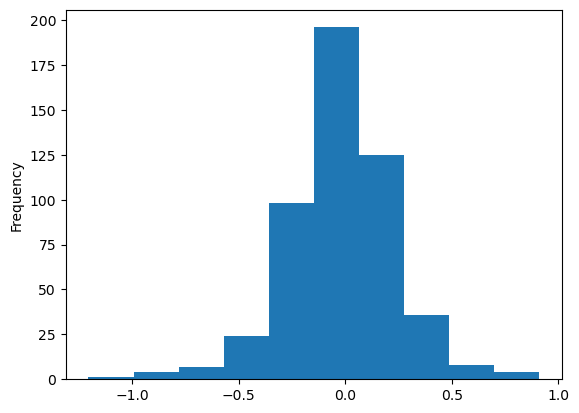

In [30]:
momentum_.plot.hist()

### Dividend Yield

In [31]:
dividend

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Dates,,,,,,,,,,,,,,,,,,,,,
2016-01-04,0.0,0.0,0.00,0.00,0,0.00,0,0.0,0,0.0,...,0.0,0.00,0.00,0.00,0.00,0.000,0.00,0,0.00,0.000
2016-01-05,0.0,0.0,0.00,0.00,0,0.00,0,0.0,0,0.0,...,0.0,0.00,0.00,0.00,0.00,0.000,0.00,0,0.00,0.000
2016-01-06,0.0,0.0,0.00,0.00,0,0.00,0,0.0,0,0.0,...,0.0,0.00,0.00,0.00,0.00,0.000,0.00,0,0.00,0.000
2016-01-07,0.0,0.0,0.00,0.00,0,0.00,0,0.0,0,0.0,...,0.0,0.00,0.00,0.00,0.00,0.000,0.00,0,0.00,0.000
2016-01-08,0.0,0.0,0.00,0.00,0,0.00,0,0.0,0,0.0,...,0.0,0.00,0.00,0.00,0.00,0.000,0.00,0,0.00,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26,0.0,0.0,0.00,0.00,0,0.00,0,0.0,0,0.0,...,0.0,0.00,0.00,0.00,0.00,0.000,0.00,0,0.00,0.000
2023-12-27,0.0,0.0,0.00,0.00,0,0.00,0,0.0,0,0.0,...,0.0,0.00,0.00,0.00,0.00,0.000,0.00,0,0.00,0.000
2023-12-28,0.0,0.0,0.00,0.00,0,0.00,0,0.0,0,0.0,...,0.0,0.00,0.00,0.00,0.00,0.000,0.00,0,0.00,0.000


In [32]:
df = dividend.replace(0, method='ffill')

In [33]:
DivYield_=df/px_last
DivYield_=DivYield_.fillna(0)
DivYield_.replace([np.inf, -np.inf], 0, inplace=True)
DivYield_

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Dates,,,,,,,,,,,,,,,,,,,,,
2016-01-04,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
2016-01-05,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
2016-01-06,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
2016-01-07,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
2016-01-08,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26,0.001688,0.007087,0.001243,0.009572,0.0,0.004669,0.0,0.003650,0.0,0.004324,...,0.010989,0.008353,0.008909,0.003939,0.002904,0.004645,0.001977,0.0,0.009135,0.003836
2023-12-27,0.001688,0.007148,0.001243,0.009556,0.0,0.004645,0.0,0.003646,0.0,0.004314,...,0.011034,0.008450,0.008951,0.003929,0.002885,0.004624,0.001981,0.0,0.009211,0.003809
2023-12-28,0.001688,0.007153,0.001240,0.009564,0.0,0.004620,0.0,0.003669,0.0,0.004295,...,0.010898,0.008402,0.009083,0.003934,0.002887,0.004635,0.001973,0.0,0.009180,0.003804


In [34]:
DivYield=DivYield_.iloc[1762:2013]
DivYield

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Dates,,,,,,,,,,,,,,,,,,,,,
2023-01-03,0.001500,0.007849,0.001839,0.009114,0.0,0.004654,0.0,0.004144,0.0,0.004678,...,0.011681,0.006957,0.008544,0.003824,0.002709,0.004490,0.001886,0.0,0.008461,0.002554
2023-01-04,0.001483,0.007358,0.001820,0.009041,0.0,0.004586,0.0,0.004158,0.0,0.004581,...,0.011001,0.006898,0.008519,0.003700,0.002713,0.004430,0.001868,0.0,0.008162,0.002517
2023-01-05,0.001479,0.007148,0.001840,0.009053,0.0,0.004603,0.0,0.004259,0.0,0.004759,...,0.010948,0.007041,0.008333,0.003778,0.002792,0.004464,0.001904,0.0,0.008308,0.002578
2023-01-06,0.001524,0.007052,0.001774,0.008886,0.0,0.004540,0.0,0.004160,0.0,0.004592,...,0.010687,0.006838,0.008233,0.003739,0.002696,0.004375,0.001909,0.0,0.007998,0.002540
2023-01-09,0.001526,0.006845,0.001767,0.009155,0.0,0.004547,0.0,0.004091,0.0,0.004548,...,0.010601,0.006773,0.008389,0.003789,0.002684,0.004393,0.001904,0.0,0.008036,0.002550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26,0.001688,0.007087,0.001243,0.009572,0.0,0.004669,0.0,0.003650,0.0,0.004324,...,0.010989,0.008353,0.008909,0.003939,0.002904,0.004645,0.001977,0.0,0.009135,0.003836
2023-12-27,0.001688,0.007148,0.001243,0.009556,0.0,0.004645,0.0,0.003646,0.0,0.004314,...,0.011034,0.008450,0.008951,0.003929,0.002885,0.004624,0.001981,0.0,0.009211,0.003809
2023-12-28,0.001688,0.007153,0.001240,0.009564,0.0,0.004620,0.0,0.003669,0.0,0.004295,...,0.010898,0.008402,0.009083,0.003934,0.002887,0.004635,0.001973,0.0,0.009180,0.003804


In [35]:
#NaN ellenorzese
x=0
for column in DivYield.columns:
    has_nan = DivYield[column].isnull().any()
    if has_nan== False:
        x=x+1
print(x)

503


In [36]:
#Inf ellenőrzése
szumma=0
for column in DivYield.columns:
    has_inf = np.isinf(DivYield[column]).any()
    if has_inf==False:
        szumma=szumma+1
print(szumma)

503


In [37]:
DivYield_=DivYield.iloc[-1]

<Axes: ylabel='Frequency'>

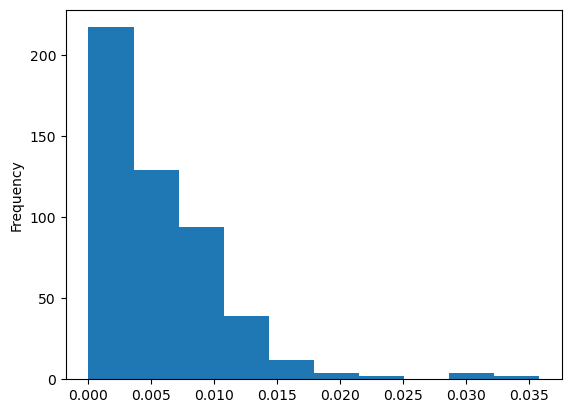

In [38]:
DivYield_.plot.hist()

### Value

In [39]:
price_to_book=pd.read_excel(r"C:\Users\demet\Desktop\Python\adat\faktorok 1-4.xlsx", sheet_name="price to book", index_col=0)
price_to_CF=pd.read_excel(r"C:\Users\demet\Desktop\Python\adat\faktorok 1-4.xlsx", sheet_name="price to cf", index_col=0)
P_per_E=pd.read_excel(r"C:\Users\demet\Desktop\Python\adat\faktorok 1-4.xlsx", sheet_name="p per e rata", index_col=0)
EBITDA=pd.read_excel(r"C:\Users\demet\Desktop\Python\adat\faktorok 1-4.xlsx", sheet_name="EBITDA", index_col=0)
SALES=pd.read_excel(r"C:\Users\demet\Desktop\Python\adat\faktorok 1-4.xlsx", sheet_name="SALES", index_col=0)
For_PE=pd.read_excel(r"C:\Users\demet\Desktop\Python\adat\faktorok 1-4.xlsx", sheet_name="forcasted p per e", index_col=0)
Market_cap=pd.read_excel(r"C:\Users\demet\Desktop\Python\adat\faktorok 1-4.xlsx", sheet_name="Market cap", index_col=0)
LT_Debt=pd.read_excel(r"C:\Users\demet\Desktop\Python\adat\faktorok 1-4.xlsx", sheet_name="LT DEBT", index_col=0)
ST_Debt=pd.read_excel(r"C:\Users\demet\Desktop\Python\adat\faktorok 1-4.xlsx", sheet_name="ST DEBT", index_col=0)
cash=pd.read_excel(r"C:\Users\demet\Desktop\Python\adat\faktorok 1-4.xlsx", sheet_name="cash", index_col=0)
total_asset=pd.read_excel(r"C:\Users\demet\Desktop\Python\adat\faktorok 1-4.xlsx", sheet_name="Total Asset", index_col=0)

In [40]:
book_to_price=1/price_to_book
book_to_price.replace([np.inf, -np.inf], 0, inplace=True)
book_to_price=book_to_price.fillna(0)
book_to_price

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Dates,,,,,,,,,,,,,,,,,,,,,
2023-01-03,0.119855,0.0,0.028630,0.060060,0.102326,0.192652,0.522220,0.134947,0.090269,0.440742,...,0.0,0.433013,0.448632,0.541477,0.175058,0.0,0.451875,0.204144,0.618123,0.064675
2023-01-04,0.118566,0.0,0.028337,0.059579,0.097920,0.189825,0.519642,0.135408,0.089082,0.431555,...,0.0,0.429332,0.447327,0.523999,0.175328,0.0,0.447708,0.201975,0.596338,0.063758
2023-01-05,0.118224,0.0,0.028641,0.059652,0.099048,0.190531,0.518242,0.138683,0.092599,0.448370,...,0.0,0.438212,0.437522,0.534931,0.180453,0.0,0.456163,0.204253,0.606943,0.065297
2023-01-06,0.121779,0.0,0.027625,0.058556,0.098141,0.187935,0.510465,0.135474,0.091400,0.432582,...,0.0,0.425604,0.432302,0.529493,0.174255,0.0,0.457540,0.194273,0.584351,0.064329
2023-01-09,0.121944,0.0,0.027512,0.060327,0.097350,0.188235,0.520481,0.133227,0.088933,0.428486,...,0.0,0.421532,0.440509,0.536567,0.173445,0.0,0.456267,0.190190,0.587096,0.064582
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26,0.143113,0.0,0.020702,0.043992,0.101490,0.197652,0.525376,0.120322,0.060681,0.360360,...,0.0,0.504032,0.493364,0.448370,0.362937,0.0,0.492999,0.212943,0.733192,0.056525
2023-12-27,0.143102,0.0,0.020691,0.043918,0.103103,0.196645,0.525155,0.120189,0.060904,0.359492,...,0.0,0.509840,0.495688,0.447227,0.360529,0.0,0.494193,0.212716,0.739317,0.056123
2023-12-28,0.143154,0.0,0.020645,0.043955,0.102764,0.195561,0.521458,0.120953,0.060961,0.357897,...,0.0,0.506971,0.502968,0.447728,0.360724,0.0,0.492150,0.213056,0.736811,0.056049


In [41]:
CF_to_price=1/price_to_CF
CF_to_price.replace([np.inf, -np.inf], 0, inplace=True)
CF_to_price=CF_to_price.fillna(0)
CF_to_price

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Dates,,,,,,,,,,,,,,,,,,,,,
2023-01-03,0.029333,0.262495,0.054300,0.086644,0.063443,0.049809,0.165648,0.055597,0.049553,0.053104,...,0.000000,0.102608,0.171600,0.073447,0.029861,0.039403,0.048148,0.036122,0.202229,0.027819
2023-01-04,0.029018,0.246081,0.053746,0.085951,0.060711,0.049080,0.164829,0.055787,0.048901,0.051996,...,0.000000,0.101737,0.171104,0.071077,0.029907,0.038877,0.047706,0.035739,0.195103,0.027425
2023-01-05,0.028934,0.239046,0.054322,0.086056,0.061410,0.049261,0.164384,0.057136,0.050832,0.054021,...,0.000000,0.103838,0.167358,0.072559,0.030781,0.039175,0.048606,0.036141,0.198582,0.028086
2023-01-06,0.029804,0.235843,0.052394,0.084474,0.060848,0.048590,0.161914,0.055814,0.050174,0.052119,...,0.000000,0.100852,0.165360,0.071821,0.029724,0.038396,0.048753,0.034375,0.191183,0.027670
2023-01-09,0.029844,0.228901,0.052180,0.087030,0.060357,0.048668,0.165093,0.054889,0.048819,0.051626,...,0.000000,0.099885,0.168501,0.072779,0.029586,0.038553,0.048618,0.033653,0.192082,0.027779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26,0.043082,0.542535,0.036331,0.093191,0.048549,0.034360,0.187210,0.042748,0.026704,0.048220,...,0.086554,0.167179,0.142116,0.047432,0.031580,0.043816,0.048734,0.008524,0.244421,0.024271
2023-12-27,0.043079,0.547196,0.036313,0.093035,0.049321,0.034185,0.187136,0.042701,0.026802,0.048104,...,0.086907,0.169107,0.142786,0.047312,0.031371,0.043622,0.048851,0.008515,0.246451,0.024099
2023-12-28,0.043094,0.547585,0.036232,0.093112,0.049159,0.033996,0.185822,0.042972,0.026827,0.047890,...,0.085837,0.168152,0.144881,0.047365,0.031387,0.043729,0.048650,0.008529,0.245628,0.024067


In [42]:
E_per_P=1/P_per_E
E_per_P.replace([np.inf, -np.inf], 0, inplace=True)
E_per_P=E_per_P.fillna(0)
E_per_P

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Dates,,,,,,,,,,,,,,,,,,,,,
2023-01-03,0.031268,0.024649,0.047094,0.064859,0.035222,0.039789,0.082347,0.041178,0.030480,0.059505,...,0.000000,0.045240,0.131850,0.042076,0.025522,0.034554,0.038490,0.050408,0.117088,0.033102
2023-01-04,0.030932,0.023108,0.046613,0.064340,0.033705,0.039206,0.081940,0.041318,0.030079,0.058265,...,0.000000,0.044856,0.131468,0.040719,0.025561,0.034093,0.038136,0.049873,0.112961,0.032633
2023-01-05,0.030843,0.022447,0.047112,0.064418,0.034093,0.039351,0.081719,0.042318,0.031267,0.060534,...,0.000000,0.045783,0.128591,0.041568,0.026308,0.034354,0.038856,0.050435,0.114976,0.033420
2023-01-06,0.031770,0.022146,0.045441,0.063235,0.033782,0.038815,0.080491,0.041338,0.030862,0.058402,...,0.000000,0.044466,0.127055,0.041145,0.025405,0.033671,0.038973,0.047971,0.110692,0.032924
2023-01-09,0.031813,0.021494,0.045255,0.065148,0.033509,0.038877,0.082071,0.040653,0.030029,0.057850,...,0.000000,0.044040,0.129468,0.041694,0.025287,0.033809,0.038865,0.046963,0.111212,0.033054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26,0.035605,0.240807,0.031702,0.054865,0.059544,0.029909,0.120642,0.034645,0.020210,0.050719,...,0.012636,0.051519,0.102068,0.030606,0.029076,0.039612,0.042341,0.036038,0.121261,0.025947
2023-12-27,0.035603,0.242872,0.031685,0.054773,0.060491,0.029757,0.120592,0.034607,0.020284,0.050597,...,0.012687,0.052113,0.102549,0.030529,0.028883,0.039437,0.042443,0.036000,0.122269,0.025763
2023-12-28,0.035615,0.243049,0.031615,0.054819,0.060292,0.029592,0.119746,0.034827,0.020303,0.050373,...,0.012531,0.051819,0.104054,0.030563,0.028898,0.039534,0.042268,0.036058,0.121859,0.025729


In [43]:
nulla=ST_Debt*0
EV=Market_cap+LT_Debt+np.maximum(ST_Debt-cash, nulla)
Ebitda_per_ev=EBITDA/EV
Ebitda_per_ev.replace([np.inf, -np.inf], 0, inplace=True)
Ebitda_per_ev=Ebitda_per_ev.fillna(0)
Ebitda_per_ev

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Dates,,,,,,,,,,,,,,,,,,,,,
2023-01-03,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
2023-01-04,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
2023-01-05,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
2023-01-06,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
2023-01-09,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
2023-12-27,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
2023-12-28,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000


In [44]:
For_EP=1/For_PE
For_EP.replace([np.inf, -np.inf], 0, inplace=True)
For_EP=For_EP.fillna(0)
For_EP

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Dates,,,,,,,,,,,,,,,,,,,,,
2023-01-03,0.046674,0.330469,0.058102,0.075654,0.054428,0.048778,0.100543,0.051311,0.056392,0.069123,...,0.063894,0.054487,0.094153,0.089542,0.038462,0.054386,0.063159,0.081820,0.135062,0.045775
2023-01-04,0.046172,0.329164,0.057511,0.075296,0.052208,0.048421,0.100050,0.051485,0.055651,0.067645,...,0.060176,0.054025,0.093932,0.086648,0.038521,0.053660,0.062578,0.080952,0.130293,0.045126
2023-01-05,0.046157,0.319693,0.058126,0.075386,0.052821,0.048600,0.099780,0.052731,0.059298,0.070279,...,0.059887,0.055142,0.091693,0.088456,0.039646,0.054072,0.063476,0.081867,0.132626,0.046215
2023-01-06,0.047578,0.315457,0.056063,0.074003,0.052340,0.047939,0.098280,0.051509,0.058531,0.067806,...,0.058459,0.053556,0.089453,0.087558,0.038285,0.052452,0.063666,0.077863,0.127681,0.045529
2023-01-09,0.047644,0.306185,0.055835,0.076576,0.051916,0.048123,0.111012,0.050656,0.056951,0.067164,...,0.057988,0.052986,0.090302,0.088723,0.038107,0.052668,0.063536,0.076231,0.128287,0.045710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26,0.043066,0.235294,0.036928,0.077833,0.037716,0.046929,0.115035,0.037807,0.034084,0.044049,...,0.059923,0.061702,0.093738,0.066912,0.039596,0.050546,0.070072,0.052882,0.100533,0.034496
2023-12-27,0.043063,0.237304,0.036909,0.077706,0.038118,0.046690,0.114982,0.037764,0.034208,0.043943,...,0.060168,0.062414,0.094180,0.066742,0.039334,0.050322,0.070240,0.052826,0.101368,0.034251
2023-12-28,0.043077,0.237473,0.036827,0.077773,0.037992,0.046432,0.114181,0.038004,0.034241,0.043748,...,0.059428,0.062062,0.095557,0.066818,0.039355,0.050444,0.069950,0.052910,0.101031,0.034206


In [45]:
SalesEV=SALES/EV
SalesEV.replace([np.inf, -np.inf], 0, inplace=True)
SalesEV=SalesEV.fillna(0)
SalesEV

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Dates,,,,,,,,,,,,,,,,,,,,,
2023-01-03,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
2023-01-04,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
2023-01-05,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
2023-01-06,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
2023-01-09,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
2023-12-27,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
2023-12-28,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000


In [46]:
Value=0.13*book_to_price+0.18*CF_to_price+0.18*E_per_P+0.21*Ebitda_per_ev+0.16*For_EP+0.13*SalesEV
Value

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Dates,,,,,,,,,,,,,,,,,,,,,
2023-01-03,0.033957,0.104561,0.031269,0.047183,0.039770,0.048977,0.128615,0.043172,0.035164,0.088626,...,0.010223,0.091622,0.128008,0.105513,0.038880,0.022014,0.084444,0.055205,0.159443,0.026697
2023-01-04,0.033592,0.101120,0.030950,0.046845,0.038078,0.048316,0.127980,0.043320,0.034701,0.086772,...,0.009628,0.090844,0.127645,0.102107,0.038940,0.021720,0.083666,0.054619,0.153822,0.026319
2023-01-05,0.033514,0.098220,0.031282,0.046902,0.038518,0.048495,0.127635,0.044368,0.036303,0.090153,...,0.009582,0.092722,0.124820,0.104237,0.040078,0.021887,0.085201,0.055235,0.156563,0.026954
2023-01-06,0.034527,0.096911,0.030172,0.046040,0.038166,0.047835,0.125718,0.043340,0.035833,0.086978,...,0.009353,0.090055,0.123147,0.103177,0.038702,0.021364,0.085458,0.052536,0.150732,0.026554
2023-01-09,0.034574,0.094061,0.030049,0.047487,0.037858,0.047928,0.129914,0.042622,0.034866,0.086155,...,0.009278,0.089183,0.125349,0.104554,0.038522,0.021452,0.085227,0.051432,0.151441,0.026659
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26,0.039659,0.178649,0.020846,0.044822,0.038685,0.044772,0.142118,0.035622,0.021787,0.071704,...,0.027442,0.114762,0.123089,0.083041,0.064435,0.023105,0.091695,0.044165,0.177223,0.021907
2023-12-27,0.039656,0.180181,0.020835,0.044748,0.039268,0.044544,0.142058,0.035582,0.021866,0.071531,...,0.027554,0.116085,0.123668,0.082830,0.064008,0.023002,0.091916,0.044118,0.178700,0.021751
2023-12-28,0.039670,0.180310,0.020789,0.044785,0.039139,0.044298,0.141061,0.035808,0.021887,0.071214,...,0.027215,0.115431,0.125483,0.082923,0.064042,0.023058,0.091537,0.044188,0.178098,0.021722


In [47]:
#NaN ellenorzese
x=0
for column in Value.columns:
    has_nan = Value[column].isnull().any()
    if has_nan== False:
        x=x+1
print(x)

503


In [48]:
#inf ellenorzese
szumma=0
for column in Value.columns:
    has_inf = np.isinf(Value[column]).any()
    if has_inf==False:
        szumma=szumma+1
print(szumma)

503


In [49]:
Value_=Value.iloc[-1]

<Axes: ylabel='Frequency'>

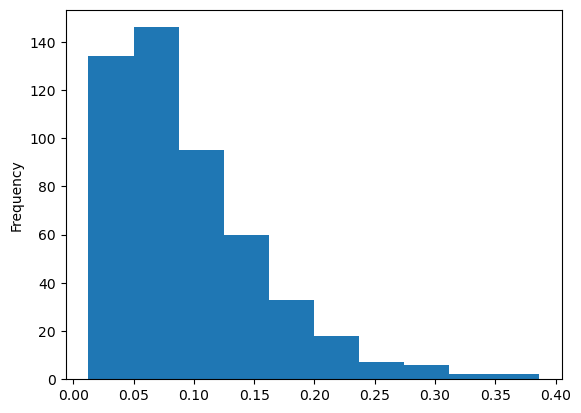

In [50]:
Value_.plot.hist()

### Size

In [51]:
logmc=Market_cap.applymap(lambda x: np.log(x) if not pd.isna(x) and x > 0 else np.nan)
logmc=logmc.fillna(0)
logmc

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Dates,,,,,,,,,,,,,,,,,,,,,
2023-01-03,10.701505,9.021567,14.503458,12.567815,10.906650,12.160347,10.047686,12.046135,11.961668,11.323400,...,9.179961,10.554398,12.991433,8.857297,9.901553,10.484672,10.192794,9.505550,8.888822,11.133752
2023-01-04,10.712310,9.086154,14.513720,12.575850,10.950661,12.175112,10.052637,12.042725,11.974906,11.344475,...,9.239919,10.562924,12.994339,8.890097,9.900016,10.498128,10.202022,9.516215,8.924696,11.148018
2023-01-05,10.715207,9.115163,14.503059,12.574628,10.939212,12.171419,10.055342,12.018829,11.936177,11.306264,...,9.244748,10.542482,13.016467,8.869459,9.871212,10.490483,10.183321,9.505011,8.907022,11.124173
2023-01-06,10.685583,9.128652,14.539192,12.593172,10.948404,12.185133,10.070479,12.042242,11.949214,11.342121,...,9.268869,10.571659,13.028481,8.879682,9.906147,10.510562,10.180303,9.555108,8.944994,11.139117
2023-01-09,10.684228,9.158526,14.543272,12.563371,10.956505,12.183529,10.051043,12.058966,11.976575,11.351622,...,9.276958,10.581291,13.009668,8.866433,9.910809,10.506486,10.183083,9.576350,8.940301,11.135181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26,10.620471,9.129288,14.914942,12.517181,11.407024,12.152828,10.219461,12.370793,12.514982,11.499755,...,9.237769,10.444374,12.921926,8.926586,10.217979,10.505422,10.141498,9.557440,8.802209,11.404858
2023-12-27,10.620542,9.120747,14.915460,12.518861,11.391257,12.157942,10.219869,12.371895,12.511331,11.502165,...,9.233695,10.432903,12.917216,8.929116,10.224646,10.509865,10.139106,9.558492,8.793931,11.411994
2023-12-28,10.620185,9.120032,14.917684,12.518021,11.394547,12.163483,10.226915,12.365573,12.510392,11.506620,...,9.246086,10.438574,12.902650,8.927992,10.224121,10.507416,10.143226,9.556895,8.797295,11.413313


In [52]:
logsales=SALES.applymap(lambda x: np.log(x) if not pd.isna(x) and x > 0 else np.nan)
logsales=logsales.fillna(0)
logsales

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Dates,,,,,,,,,,,,,,,,,,,,,
2023-01-03,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2023-01-04,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2023-01-05,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2023-01-06,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2023-01-09,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2023-12-27,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2023-12-28,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [53]:
logta=total_asset.applymap(lambda x: np.log(x) if not pd.isna(x) and x > 0 else np.nan)
logta=logta.fillna(0)
logta

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Dates,,,,,,,,,,,,,,,,,,,,,
2023-01-03,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
2023-01-04,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
2023-01-05,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
2023-01-06,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
2023-01-09,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
2023-12-27,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
2023-12-28,0.0,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000


In [54]:
Size=0.28*logmc+0.36*logsales+0.36*logta
Size

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Dates,,,,,,,,,,,,,,,,,,,,,
2023-01-03,2.996421,2.526039,4.060968,3.518988,3.053862,3.404897,2.813352,3.372918,3.349267,3.170552,...,2.570389,2.955231,3.637601,2.480043,2.772435,2.935708,2.853982,2.661554,2.488870,3.117450
2023-01-04,2.999447,2.544123,4.063842,3.521238,3.066185,3.409031,2.814738,3.371963,3.352974,3.176453,...,2.587177,2.957619,3.638415,2.489227,2.772005,2.939476,2.856566,2.664540,2.498915,3.121445
2023-01-05,3.000258,2.552246,4.060856,3.520896,3.062979,3.407997,2.815496,3.365272,3.342129,3.165754,...,2.588529,2.951895,3.644611,2.483449,2.763939,2.937335,2.851330,2.661403,2.493966,3.114768
2023-01-06,2.991963,2.556023,4.070974,3.526088,3.065553,3.411837,2.819734,3.371828,3.345780,3.175794,...,2.595283,2.960065,3.647975,2.486311,2.773721,2.942957,2.850485,2.675430,2.504598,3.118953
2023-01-09,2.991584,2.564387,4.072116,3.517744,3.067821,3.411388,2.814292,3.376510,3.353441,3.178454,...,2.597548,2.962762,3.642707,2.482601,2.775027,2.941816,2.851263,2.681378,2.503284,3.117851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26,2.973732,2.556201,4.176184,3.504811,3.193967,3.402792,2.861449,3.463822,3.504195,3.219931,...,2.586575,2.924425,3.618139,2.499444,2.861034,2.941518,2.839619,2.676083,2.464619,3.193360
2023-12-27,2.973752,2.553809,4.176329,3.505281,3.189552,3.404224,2.861563,3.464131,3.503173,3.220606,...,2.585435,2.921213,3.616820,2.500152,2.862901,2.942762,2.838950,2.676378,2.462301,3.195358
2023-12-28,2.973652,2.553609,4.176951,3.505046,3.190473,3.405775,2.863536,3.462360,3.502910,3.221854,...,2.588904,2.922801,3.612742,2.499838,2.862754,2.942077,2.840103,2.675931,2.463243,3.195728


In [55]:
#NaN ellenorzese
x=0
for column in Size.columns:
    has_nan = Size[column].isnull().any()
    if has_nan== False:
        x=x+1
print(x)

503


In [56]:
#inf ellenorzese
szumma=0
for column in Size.columns:
    has_inf = np.isinf(Size[column]).any()
    if has_inf==False:
        szumma=szumma+1
print(szumma)

503


In [57]:
Size_=Size.iloc[-1]

<Axes: ylabel='Frequency'>

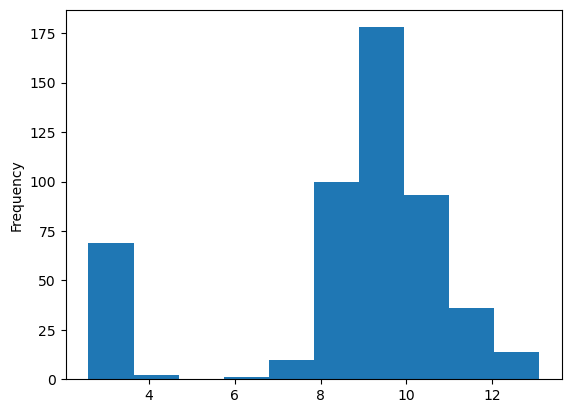

In [58]:
Size_.plot.hist()

### Trading Activity

In [59]:
volume=pd.read_excel(r"C:\Users\demet\Desktop\Python\adat\faktorok 1-4.xlsx", sheet_name="Volume", index_col=0)
shares_out=pd.read_excel(r"C:\Users\demet\Desktop\Python\adat\faktorok 1-4.xlsx", sheet_name="SH OUT", index_col=0)

In [60]:
#Volume/Share outstanding
v_per_s=volume/(shares_out*1000000)
v_per_s=v_per_s.fillna(0)
v_per_s.replace([np.inf, -np.inf], 0, inplace=True)
v_per_s

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Dates,,,,,,,,,,,,,,,,,,,,,
2021-01-04,0.002231,0.017706,0.002083,0.001278,0.014030,0.001035,0.002019,0.001346,0.002708,0.003464,...,0.009992,0.002835,0.001549,0.003920,0.001634,0.001911,0.001802,0.002562,0.004528,0.001391
2021-01-05,0.002204,0.013725,0.001186,0.000828,0.012933,0.000797,0.001834,0.000900,0.001707,0.001973,...,0.005620,0.001867,0.001732,0.002895,0.001841,0.001521,0.001274,0.002526,0.003283,0.001022
2021-01-06,0.002490,0.017259,0.002076,0.001485,0.006718,0.001012,0.002818,0.001318,0.003167,0.003077,...,0.006649,0.002472,0.001649,0.002600,0.001977,0.001425,0.001715,0.003118,0.009200,0.001216
2021-01-07,0.001693,0.012247,0.001425,0.000997,0.008457,0.000988,0.001988,0.001254,0.002375,0.003220,...,0.007909,0.002134,0.001741,0.002115,0.002777,0.002537,0.001782,0.002613,0.005788,0.001025
2021-01-08,0.001481,0.015869,0.001335,0.000923,0.009652,0.000903,0.001621,0.001142,0.001659,0.003986,...,0.007286,0.001989,0.001740,0.002076,0.002243,0.001448,0.001742,0.002631,0.006203,0.000982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26,0.000838,0.007019,0.000587,0.000371,0.002556,0.000528,0.001424,0.000901,0.001067,0.001572,...,0.003931,0.001525,0.001049,0.001971,0.000610,0.000774,0.003800,0.001305,0.002776,0.000572
2023-12-27,0.001091,0.006640,0.000889,0.001076,0.003727,0.000550,0.000950,0.000786,0.001200,0.001619,...,0.003470,0.001984,0.000882,0.002196,0.001632,0.001321,0.001650,0.001864,0.003820,0.000552
2023-12-28,0.001179,0.004962,0.000697,0.000571,0.002129,0.000608,0.001478,0.000885,0.001641,0.002114,...,0.003310,0.001590,0.000838,0.002036,0.001059,0.001376,0.000872,0.001509,0.003433,0.000635


In [61]:
start_index = v_per_s.index.get_loc('2023-01-03')
end_index = len(v_per_s)
trad_act = pd.DataFrame(index=v_per_s.index[start_index:end_index], columns=v_per_s.columns)

sum_values=0
for i in range(start_index, end_index):
    for k in range(-500, 0):
        x=np.exp(k*np.log(2)/180)*v_per_s.iloc[i+k, :]
        sum_values = sum_values+x
    trad_act.iloc[i-start_index, :] = sum_values
    sum_values=0

trad_act

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Dates,,,,,,,,,,,,,,,,,,,,,
2023-01-03,0.360268,2.299246,0.286815,0.226565,1.359389,0.220102,0.572621,0.267228,0.55371,0.697719,...,1.98381,0.542766,0.305587,0.767185,0.472619,0.420664,0.417032,0.652522,0.86491,0.297289
2023-01-04,0.360254,2.295219,0.287261,0.226306,1.355969,0.219955,0.571863,0.267399,0.552998,0.696817,...,1.984928,0.542505,0.305156,0.767129,0.472161,0.420601,0.416617,0.652235,0.864459,0.29719
2023-01-05,0.359907,2.296656,0.287271,0.226115,1.352592,0.219934,0.571295,0.267222,0.552447,0.696352,...,1.990749,0.542333,0.304773,0.77088,0.471889,0.42019,0.416306,0.651954,0.86477,0.297013
2023-01-06,0.359731,2.294776,0.287142,0.225679,1.349427,0.219968,0.570922,0.266969,0.551759,0.697608,...,1.991841,0.541701,0.304101,0.778811,0.472927,0.419642,0.417138,0.651747,0.863657,0.296618
2023-01-09,0.359782,2.293778,0.287308,0.225527,1.345313,0.219747,0.570161,0.266685,0.551395,0.698039,...,1.990918,0.541447,0.303682,0.779889,0.472238,0.419572,0.418233,0.652778,0.86386,0.296253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26,0.399281,2.014126,0.24821,0.21909,1.104336,0.22218,0.526694,0.25514,0.54719,0.645274,...,1.686452,0.604603,0.277111,0.890746,0.536581,0.431262,0.482687,0.700438,1.645277,0.287057
2023-12-27,0.398453,2.012478,0.247732,0.218522,1.102424,0.22177,0.52602,0.25495,0.545932,0.644097,...,1.683055,0.603648,0.277002,0.88893,0.534925,0.430158,0.484091,0.698915,1.641409,0.286427
2023-12-28,0.397906,2.010225,0.24757,0.218576,1.101634,0.221401,0.524858,0.254655,0.544874,0.643021,...,1.679089,0.603139,0.276724,0.887359,0.534367,0.429716,0.483682,0.697987,1.638704,0.285786


In [62]:
trad_act=trad_act.astype(float)
trad_act.dtypes

A       float64
AAL     float64
AAPL    float64
ABBV    float64
ABNB    float64
         ...   
YUM     float64
ZBH     float64
ZBRA    float64
ZION    float64
ZTS     float64
Length: 503, dtype: object

In [63]:
#NaN ellenorzese
x=0
for column in trad_act.columns:
    has_nan = trad_act[column].isnull().any()
    if has_nan== False:
        x=x+1
print(x)

503


In [64]:
#inf ellenorzese
szumma=0
for column in trad_act.columns:
    has_inf = np.isinf(trad_act[column]).any()
    if has_inf==False:
        szumma=szumma+1
print(szumma)

503


In [65]:
trad_act_=trad_act.iloc[-1]

<Axes: ylabel='Frequency'>

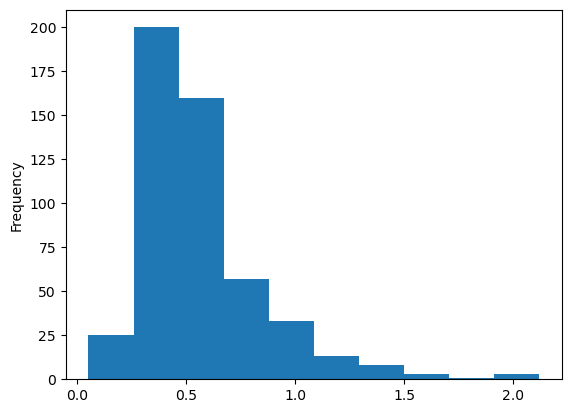

In [66]:
trad_act_.plot.hist()

### Leverage

In [67]:
book_value=pd.read_excel(r"C:\Users\demet\Desktop\Python\adat\faktorok 5-7.xlsx", sheet_name="book value", index_col=0)

In [68]:
szamlalo=LT_Debt+np.maximum(ST_Debt-cash, nulla)
nevezo=book_value+LT_Debt+np.maximum(ST_Debt-cash, nulla)

BLev=szamlalo/nevezo
BLev=BLev.fillna(0)
BLev.replace([np.inf, -np.inf], 0, inplace=True)

MLev=szamlalo/EV
MLev=MLev.fillna(0)
MLev.replace([np.inf, -np.inf], 0, inplace=True)

D2TA=szamlalo/total_asset
D2TA=D2TA.fillna(0)
D2TA.replace([np.inf, -np.inf], 0, inplace=True)

In [69]:
Leverage=0.34*BLev+0.33*MLev+0.33*D2TA
Leverage

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Dates,,,,,,,,,,,,,,,,,,,,,
2023-01-03,0.0,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.0,0.0,0.0,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2023-01-04,0.0,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.0,0.0,0.0,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2023-01-05,0.0,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.0,0.0,0.0,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2023-01-06,0.0,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.0,0.0,0.0,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2023-01-09,0.0,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.0,0.0,0.0,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26,0.0,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.0,0.0,0.0,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2023-12-27,0.0,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.0,0.0,0.0,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2023-12-28,0.0,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.0,0.0,0.0,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [70]:
#NaN ellenorzese
x=0
for column in Leverage.columns:
    has_nan = Leverage[column].isnull().any()
    if has_nan== False:
        x=x+1
print(x)

503


In [71]:
#inf ellenorzese
szumma=0
for column in Leverage.columns:
    has_inf = np.isinf(Leverage[column]).any()
    if has_inf==False:
        szumma=szumma+1
print(szumma)

503


In [72]:
Leverage_=Leverage.iloc[-1]

<Axes: ylabel='Frequency'>

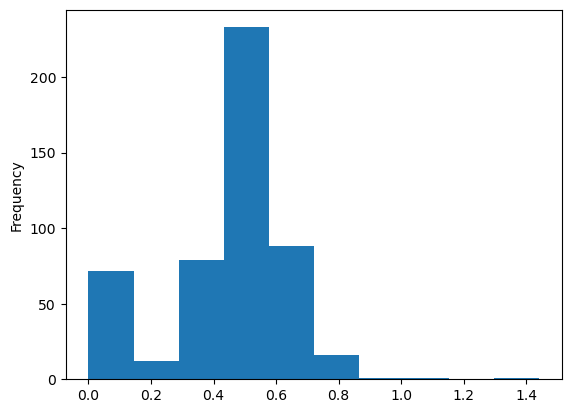

In [73]:
Leverage_.plot.hist()

### Profitability

In [74]:
ROE=pd.read_excel(r"C:\Users\demet\Desktop\Python\adat\faktorok 8-10.xlsx", sheet_name="ROE", index_col=0 )
ROCE=pd.read_excel(r"C:\Users\demet\Desktop\Python\adat\faktorok 8-10.xlsx", sheet_name="ROCE", index_col=0 )
ROA=pd.read_excel(r"C:\Users\demet\Desktop\Python\adat\faktorok 8-10.xlsx", sheet_name="ROA", index_col=0 )
Ebitda_margin=pd.read_excel(r"C:\Users\demet\Desktop\Python\adat\faktorok 8-10.xlsx", sheet_name="EBITDA_MARGIN", index_col=0)

In [75]:
Profitability=0.26*(ROE/100)+0.28*(ROCE/100)+0.28*(ROA/100)+0.18*(Ebitda_margin/100)
Profitability

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Dates,,,,,,,,,,,,,,,,,,,,,
2023-01-03,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2023-01-04,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2023-01-05,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2023-01-06,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2023-01-09,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2023-12-27,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2023-12-28,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [76]:
x=0
for column in Profitability.columns:
    has_nan = Profitability[column].isnull().any()
    if has_nan== False:
        x=x+1
print(x)

503


In [77]:
szumma=0
for column in Profitability.columns:
    has_inf = np.isinf(Profitability[column]).any()
    if has_inf==False:
        szumma=szumma+1
print(szumma)

503


In [78]:
Profitability_=Profitability.iloc[-1]

<Axes: ylabel='Frequency'>

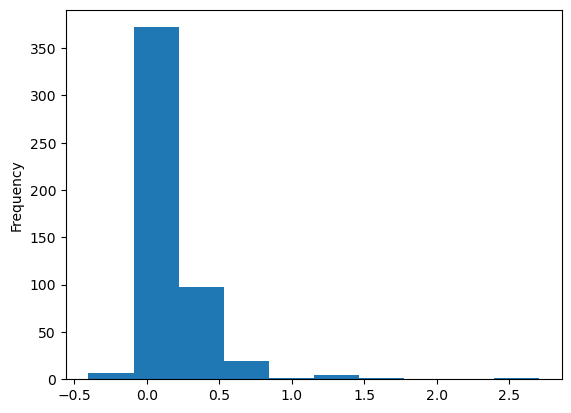

In [79]:
Profitability_.plot.hist()

### Earnings Variability

In [80]:
Earnings=pd.read_excel(r"C:\Users\demet\Desktop\Python\adat\faktorok 5-7.xlsx", sheet_name="is inc bef xo item 2016", index_col=0 )
total_asset5y=pd.read_excel(r"C:\Users\demet\Desktop\Python\adat\faktorok 5-7.xlsx", sheet_name="total ass 2016", index_col=0)
sales5y=pd.read_excel(r"C:\Users\demet\Desktop\Python\adat\faktorok 5-7.xlsx", sheet_name="sales 2016", index_col=0)
cash5y=pd.read_excel(r"C:\Users\demet\Desktop\Python\adat\faktorok 5-7.xlsx", sheet_name="cash 2016", index_col=0)

In [81]:
Earnings=Earnings.replace(0, np.nan)
start_index = Earnings.index.get_loc('2023-01-03')
result_dfear = pd.DataFrame(index=Earnings.index[start_index:], columns=Earnings.columns)

for column in Earnings.columns:
    std_devs = []
    for i in range(start_index, len(Earnings)):
        window = Earnings.loc[Earnings.index[i-1260]:Earnings.index[i], column]  
        std_dev = window.std()             
        std_devs.append(std_dev)

    result_dfear[column] = std_devs  

result_dfear

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Dates,,,,,,,,,,,,,,,,,,,,,
2023-01-03,160.023518,1107.751354,6977.813960,1664.646093,1006.892526,774.435429,235.853477,289.619147,377.655844,201.696094,...,346.431477,133.403952,8044.637009,371.519740,48.838412,103.057011,394.842302,76.736873,76.036551,113.547053
2023-01-04,160.023518,1107.751354,6977.813960,1664.646093,1006.892526,774.435429,235.853477,289.619147,377.655844,201.696094,...,346.431477,133.403952,8044.637009,371.519740,48.838412,103.057011,394.842302,76.736873,76.036551,113.547053
2023-01-05,160.023518,1135.643396,7153.750596,1646.477768,1006.892526,642.351158,238.651700,289.619147,377.655844,201.696094,...,320.033228,130.593383,8211.878729,358.302595,49.675897,103.138639,310.217497,72.748648,75.319582,85.120889
2023-01-06,160.023518,1135.643396,7153.750596,1646.477768,1006.892526,642.351158,238.651700,289.619147,377.655844,201.696094,...,320.033228,130.593383,8211.878729,358.302595,49.675897,103.138639,310.217497,72.748648,75.319582,85.120889
2023-01-09,160.023518,1135.643396,7153.750596,1646.477768,1006.892526,642.351158,238.651700,289.619147,377.655844,201.696094,...,320.033228,130.593383,8211.878729,358.302595,49.675897,103.138639,310.217497,72.748648,75.319582,85.120889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26,111.566407,1167.480926,6806.653207,1676.891782,1438.562885,573.097594,252.785997,285.827973,343.425899,275.559516,...,306.229034,140.812258,8435.773287,264.897556,50.313622,100.553782,312.057360,78.988940,75.877654,99.177817
2023-12-27,111.566407,1167.480926,6806.653207,1676.891782,1438.562885,573.097594,252.785997,285.827973,343.425899,275.559516,...,306.229034,140.812258,8435.773287,264.897556,50.313622,100.553782,312.057360,78.988940,75.877654,99.177817
2023-12-28,111.566407,1167.480926,6806.653207,1676.891782,1438.562885,573.097594,252.785997,285.827973,343.425899,275.559516,...,306.229034,140.812258,8435.773287,264.897556,50.313622,100.553782,312.057360,78.988940,75.877654,99.177817


In [82]:
cash5y=cash5y.replace(0, np.nan)
start_index = cash5y.index.get_loc('2023-01-03')
result_dfcash = pd.DataFrame(index=cash5y.index[start_index:], columns=cash5y.columns)

for column in cash5y.columns:
    std_devs = []
    for i in range(start_index, len(cash5y)):
        window = cash5y.loc[cash5y.index[i-1260]:cash5y.index[i], column] 
        std_dev = window.std()             
        std_devs.append(std_dev)

    result_dfcash[column] = std_devs 

result_dfcash

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Dates,,,,,,,,,,,,,,,,,,,,,
2023-01-03,114.566506,1521.581040,9088.273926,1646.212156,449.789967,793.427270,324.851668,907.531999,437.491018,270.453374,...,261.343894,306.251147,5466.018640,78.882566,127.974272,242.649806,130.862823,101.022840,171.458839,139.911877
2023-01-04,114.566506,1521.581040,9088.273926,1646.212156,449.789967,793.427270,324.851668,907.531999,437.491018,270.453374,...,261.343894,306.251147,5466.018640,78.882566,127.974272,242.649806,130.862823,101.022840,171.458839,139.911877
2023-01-05,114.566506,1558.020586,9247.899858,1627.368443,449.789967,809.521007,299.986326,907.531999,437.491018,270.453374,...,235.298614,314.200757,5561.358331,78.831939,127.620026,248.330722,134.009114,102.504673,174.227770,141.169402
2023-01-06,114.566506,1558.020586,9247.899858,1627.368443,449.789967,809.521007,299.986326,907.531999,437.491018,270.453374,...,235.298614,314.200757,5561.358331,78.831939,127.620026,248.330722,134.009114,102.504673,174.227770,141.169402
2023-01-09,114.566506,1558.020586,9247.899858,1627.368443,449.789967,809.521007,299.986326,907.531999,437.491018,270.453374,...,235.298614,314.200757,5561.358331,78.831939,127.620026,248.330722,134.009114,102.504673,174.227770,141.169402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26,133.719059,1696.779162,8846.308938,1656.892002,580.979644,809.303240,382.137253,1008.690895,394.478719,332.607806,...,235.661158,517.835515,5728.809707,85.285011,143.960987,240.346345,127.442509,137.119848,189.216911,156.201321
2023-12-27,133.719059,1696.779162,8846.308938,1656.892002,580.979644,809.303240,382.137253,1008.690895,394.478719,332.607806,...,235.661158,517.835515,5728.809707,85.285011,143.960987,240.346345,127.442509,137.119848,189.216911,156.201321
2023-12-28,133.719059,1696.779162,8846.308938,1656.892002,580.979644,809.303240,382.137253,1008.690895,394.478719,332.607806,...,235.661158,517.835515,5728.809707,85.285011,143.960987,240.346345,127.442509,137.119848,189.216911,156.201321


In [83]:
sales5y=sales5y.replace(0, np.nan)
start_index = sales5y.index.get_loc('2023-01-03')
result_dfsales = pd.DataFrame(index=sales5y.index[start_index:], columns=sales5y.columns)

for column in sales5y.columns:
    std_devs = []
    for i in range(start_index, len(sales5y)):
        window = sales5y.loc[sales5y.index[i-1260]:sales5y.index[i], column]  
        std_dev = window.std()            
        std_devs.append(std_dev)

    result_dfsales[column] = std_devs 

result_dfsales

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Dates,,,,,,,,,,,,,,,,,,,,,
2023-01-03,202.322118,3475.670581,21149.904229,2990.300595,614.764500,1598.171126,481.260777,2059.063386,802.007527,630.542824,...,488.060019,439.262222,19036.777836,130.462210,86.300582,212.004829,211.156249,184.965492,66.914338,238.354128
2023-01-04,202.322118,3475.670581,21149.904229,2990.300595,614.764500,1598.171126,481.260777,2059.063386,802.007527,630.542824,...,488.060019,439.262222,19036.777836,130.462210,86.300582,212.004829,211.156249,184.965492,66.914338,238.354128
2023-01-05,202.322118,3554.320395,21609.133192,2962.360067,614.764500,1599.985687,477.146272,2059.063386,802.007527,630.542824,...,489.346831,442.967657,19509.413716,131.296617,88.359002,217.112941,210.269647,184.305660,66.542013,236.911398
2023-01-06,202.322118,3554.320395,21609.133192,2962.360067,614.764500,1599.985687,477.146272,2059.063386,802.007527,630.542824,...,489.346831,442.967657,19509.413716,131.296617,88.359002,217.112941,210.269647,184.305660,66.542013,236.911398
2023-01-09,202.322118,3554.320395,21609.133192,2962.360067,614.764500,1599.985687,477.146272,2059.063386,802.007527,630.542824,...,489.346831,442.967657,19509.413716,131.296617,88.359002,217.112941,210.269647,184.305660,66.542013,236.911398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26,197.683399,3800.903691,19898.835619,2704.640365,772.995236,1457.450849,570.028895,2274.788212,782.987564,777.239385,...,472.882887,475.029639,20258.334807,130.603136,209.591357,214.537023,202.188311,179.268477,149.331237,230.248859
2023-12-27,197.683399,3800.903691,19898.835619,2704.640365,772.995236,1457.450849,570.028895,2274.788212,782.987564,777.239385,...,472.882887,475.029639,20258.334807,130.603136,209.591357,214.537023,202.188311,179.268477,149.331237,230.248859
2023-12-28,197.683399,3800.903691,19898.835619,2704.640365,772.995236,1457.450849,570.028895,2274.788212,782.987564,777.239385,...,472.882887,475.029639,20258.334807,130.603136,209.591357,214.537023,202.188311,179.268477,149.331237,230.248859


In [84]:
total_asset5y=total_asset5y.replace(0, np.nan)
start_index = total_asset5y.index.get_loc('2023-01-03')
median_tot_ass = pd.DataFrame(index=total_asset5y.index[start_index:], columns=total_asset5y.columns)

for column in total_asset5y.columns:
    medians = []
    for i in range(start_index, len(total_asset5y)):
        window = total_asset5y.loc[total_asset5y.index[i-1260]:total_asset5y.index[i], column]
        median = window.median()            
        medians.append(median)

    median_tot_ass[column] = medians 

median_tot_ass

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Dates,,,,,,,,,,,,,,,,,,,,,
2023-01-03,9523.5,62008.0,346747.0,138805.0,13645.0015,71637.0,41199.6480,36067.9560,22008.5,21577.4335,...,13161.2270,53456.0,354771.0,8822.00,7952.0,5649.0,24205.70,4711.0,76447.0,13069.0
2023-01-04,9523.5,62008.0,346747.0,138805.0,13645.0015,71637.0,41199.6480,36067.9560,22008.5,21577.4335,...,13161.2270,53456.0,354771.0,8822.00,7952.0,5649.0,24205.70,4711.0,76447.0,13069.0
2023-01-05,9523.5,62390.5,344372.5,140065.0,13645.0015,71272.5,41957.8415,36067.9560,22008.5,21577.4335,...,13163.2505,53582.0,355287.5,8795.60,8029.0,5714.0,24166.25,4978.0,77402.0,13339.0
2023-01-06,9523.5,62390.5,344372.5,140065.0,13645.0015,71272.5,41957.8415,36067.9560,22008.5,21577.4335,...,13163.2505,53582.0,355287.5,8795.60,8029.0,5714.0,24166.25,4978.0,77402.0,13339.0
2023-01-09,9523.5,62390.5,344372.5,140065.0,13645.0015,71272.5,41957.8415,36067.9560,22008.5,21577.4335,...,13163.2505,53582.0,355287.5,8795.60,8029.0,5714.0,24166.25,4978.0,77402.0,13339.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26,10362.5,65213.5,339567.0,140065.0,15484.8100,72666.5,44494.0015,42650.3635,25779.0,21802.3015,...,13246.6635,56645.0,358702.0,8604.35,8170.0,5803.0,24017.05,5502.0,86164.5,13715.0
2023-12-27,10362.5,65213.5,339567.0,140065.0,15484.8100,72666.5,44494.0015,42650.3635,25779.0,21802.3015,...,13246.6635,56645.0,358702.0,8604.35,8170.0,5803.0,24017.05,5502.0,86164.5,13715.0
2023-12-28,10362.5,65213.5,339567.0,140065.0,15484.8100,72666.5,44494.0015,42650.3635,25779.0,21802.3015,...,13246.6635,56645.0,358702.0,8604.35,8170.0,5803.0,24017.05,5502.0,86164.5,13715.0


In [94]:
EarnVol=result_dfear/median_tot_ass
CFVol=result_dfcash/median_tot_ass
SalesVol=result_dfsales/median_tot_ass

In [95]:
EarVariability=0.34*EarnVol+0.35*CFVol+0.31*SalesVol
EarVariability=EarVariability.fillna(0)
EarVariability.replace([np.inf, -np.inf], 0, inplace=True)
EarVariability

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Dates,,,,,,,,,,,,,,,,,,,,,
2023-01-03,0.016509,0.032039,0.034924,0.014907,0.050593,0.014468,0.008327,0.029234,0.024088,0.016624,...,0.027395,0.005401,0.029737,0.022032,0.011085,0.032871,0.010143,0.025215,0.001395,0.012355
2023-01-04,0.016509,0.032039,0.034924,0.014907,0.050593,0.014468,0.008327,0.029234,0.024088,0.016624,...,0.027395,0.005401,0.029737,0.022032,0.011085,0.032871,0.010143,0.025215,0.001395,0.012355
2023-01-05,0.016509,0.032589,0.035914,0.014620,0.050593,0.013999,0.007962,0.029234,0.024088,0.016624,...,0.026047,0.005444,0.030360,0.021615,0.011078,0.033127,0.009003,0.023653,0.001385,0.011380
2023-01-06,0.016509,0.032589,0.035914,0.014620,0.050593,0.013999,0.007962,0.029234,0.024088,0.016624,...,0.026047,0.005444,0.030360,0.021615,0.011078,0.033127,0.009003,0.023653,0.001385,0.011380
2023-01-09,0.016509,0.032589,0.035914,0.014620,0.050593,0.013999,0.007962,0.029234,0.024088,0.016624,...,0.026047,0.005444,0.030360,0.021615,0.011078,0.033127,0.009003,0.023653,0.001385,0.011380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26,0.014091,0.033261,0.034100,0.014197,0.060193,0.012797,0.008909,0.027090,0.019301,0.020688,...,0.025153,0.006645,0.031094,0.018642,0.016214,0.031848,0.008885,0.023704,0.001605,0.011649
2023-12-27,0.014091,0.033261,0.034100,0.014197,0.060193,0.012797,0.008909,0.027090,0.019301,0.020688,...,0.025153,0.006645,0.031094,0.018642,0.016214,0.031848,0.008885,0.023704,0.001605,0.011649
2023-12-28,0.014091,0.033261,0.034100,0.014197,0.060193,0.012797,0.008909,0.027090,0.019301,0.020688,...,0.025153,0.006645,0.031094,0.018642,0.016214,0.031848,0.008885,0.023704,0.001605,0.011649


In [96]:
#NaN ellenorzese
x=0
for column in EarVariability.columns:
    has_nan = EarVariability[column].isnull().any()
    if has_nan== False:
        x=x+1
print(x)

503


In [97]:
#inf ellenorzese
szumma=0
for column in EarVariability.columns:
    has_inf = np.isinf(EarVariability[column]).any()
    if has_inf==False:
        szumma=szumma+1
print(szumma)

503


In [98]:
EarVariability_=EarVariability.iloc[-1]

<Axes: ylabel='Frequency'>

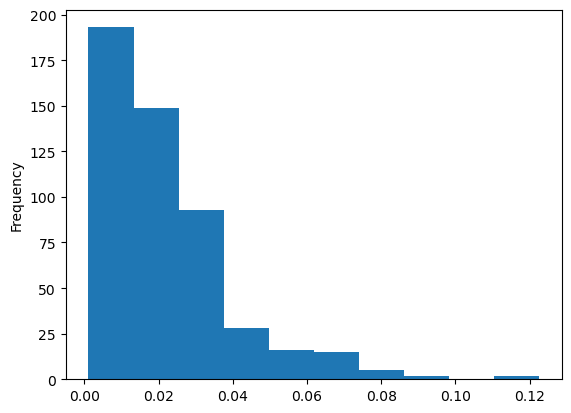

In [99]:
EarVariability_.plot.hist()

### Volatility

###  $$ \text{CAPM: } r_i = r_f + \beta_i (r_M - r_f)$$

In [91]:
px_last_2016=px_last
div_2016=dividend
sp500=pd.read_excel(r"C:\Users\demet\Desktop\Python\adat\faktorok 8-10.xlsx", sheet_name="sp500 index", index_col=0)
rf_2016=rfree

In [100]:
r_excess=hozam

In [101]:
rf2=rf.iloc[1:]
rf2

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Dates,,,,,,,,,,,,,,,,,,,,,
2016-01-05,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061,...,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061,0.000061
2016-01-06,0.000059,0.000059,0.000059,0.000059,0.000059,0.000059,0.000059,0.000059,0.000059,0.000059,...,0.000059,0.000059,0.000059,0.000059,0.000059,0.000059,0.000059,0.000059,0.000059,0.000059
2016-01-07,0.000059,0.000059,0.000059,0.000059,0.000059,0.000059,0.000059,0.000059,0.000059,0.000059,...,0.000059,0.000059,0.000059,0.000059,0.000059,0.000059,0.000059,0.000059,0.000059,0.000059
2016-01-08,0.000058,0.000058,0.000058,0.000058,0.000058,0.000058,0.000058,0.000058,0.000058,0.000058,...,0.000058,0.000058,0.000058,0.000058,0.000058,0.000058,0.000058,0.000058,0.000058,0.000058
2016-01-11,0.000060,0.000060,0.000060,0.000060,0.000060,0.000060,0.000060,0.000060,0.000060,0.000060,...,0.000060,0.000060,0.000060,0.000060,0.000060,0.000060,0.000060,0.000060,0.000060,0.000060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26,0.000107,0.000107,0.000107,0.000107,0.000107,0.000107,0.000107,0.000107,0.000107,0.000107,...,0.000107,0.000107,0.000107,0.000107,0.000107,0.000107,0.000107,0.000107,0.000107,0.000107
2023-12-27,0.000104,0.000104,0.000104,0.000104,0.000104,0.000104,0.000104,0.000104,0.000104,0.000104,...,0.000104,0.000104,0.000104,0.000104,0.000104,0.000104,0.000104,0.000104,0.000104,0.000104
2023-12-28,0.000105,0.000105,0.000105,0.000105,0.000105,0.000105,0.000105,0.000105,0.000105,0.000105,...,0.000105,0.000105,0.000105,0.000105,0.000105,0.000105,0.000105,0.000105,0.000105,0.000105


In [102]:
#rM-rf
osztas=(sp500/sp500.shift(1))
rm = osztas.applymap(lambda x: np.log(x) if not pd.isna(x) and x > 0 else np.nan)
rM=rm.drop(rm.index[0])
market=rM-rf2
market

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Dates,,,,,,,,,,,,,,,,,,,,,
2016-01-05,0.001949,0.001949,0.001949,0.001949,0.001949,0.001949,0.001949,0.001949,0.001949,0.001949,...,0.001949,0.001949,0.001949,0.001949,0.001949,0.001949,0.001949,0.001949,0.001949,0.001949
2016-01-06,-0.013262,-0.013262,-0.013262,-0.013262,-0.013262,-0.013262,-0.013262,-0.013262,-0.013262,-0.013262,...,-0.013262,-0.013262,-0.013262,-0.013262,-0.013262,-0.013262,-0.013262,-0.013262,-0.013262,-0.013262
2016-01-07,-0.024045,-0.024045,-0.024045,-0.024045,-0.024045,-0.024045,-0.024045,-0.024045,-0.024045,-0.024045,...,-0.024045,-0.024045,-0.024045,-0.024045,-0.024045,-0.024045,-0.024045,-0.024045,-0.024045,-0.024045
2016-01-08,-0.010956,-0.010956,-0.010956,-0.010956,-0.010956,-0.010956,-0.010956,-0.010956,-0.010956,-0.010956,...,-0.010956,-0.010956,-0.010956,-0.010956,-0.010956,-0.010956,-0.010956,-0.010956,-0.010956,-0.010956
2016-01-11,0.000793,0.000793,0.000793,0.000793,0.000793,0.000793,0.000793,0.000793,0.000793,0.000793,...,0.000793,0.000793,0.000793,0.000793,0.000793,0.000793,0.000793,0.000793,0.000793,0.000793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26,0.004116,0.004116,0.004116,0.004116,0.004116,0.004116,0.004116,0.004116,0.004116,0.004116,...,0.004116,0.004116,0.004116,0.004116,0.004116,0.004116,0.004116,0.004116,0.004116,0.004116
2023-12-27,0.001325,0.001325,0.001325,0.001325,0.001325,0.001325,0.001325,0.001325,0.001325,0.001325,...,0.001325,0.001325,0.001325,0.001325,0.001325,0.001325,0.001325,0.001325,0.001325,0.001325
2023-12-28,0.000265,0.000265,0.000265,0.000265,0.000265,0.000265,0.000265,0.000265,0.000265,0.000265,...,0.000265,0.000265,0.000265,0.000265,0.000265,0.000265,0.000265,0.000265,0.000265,0.000265


In [103]:
#CAPM beta es rezidualisok volatilitasanak kiszamolasa
#ez egy kicsit tobb ideig fut, kb 6-7 perc
start_index = r_excess.index.get_loc('2023-01-03')
end_index = len(rM)

beta = pd.DataFrame(index=r_excess.index[start_index:], columns=r_excess.columns)
resid_vol = pd.DataFrame(index=r_excess.index[start_index:], columns=r_excess.columns)

for date in r_excess.index[start_index:]:
    for stock in r_excess.columns:
        
        start_date_index = r_excess.index.get_loc(date) - 1260
        end_date_index = r_excess.index.get_loc(date)  
        
        X = sm.add_constant(market[stock].loc[market.index[start_date_index:end_date_index]])
        
        y = r_excess[stock].loc[r_excess.index[start_date_index:end_date_index]]
        model = sm.OLS(y, X)
        results = model.fit()
        beta.at[date, stock] = results.params[1]
        resid_vol.at[date, stock] = np.std(results.resid)

In [104]:
beta

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Dates,,,,,,,,,,,,,,,,,,,,,
2023-01-03,0.993236,1.373948,1.226425,0.682178,0.508026,0.854663,1.007798,1.087828,1.274266,1.248584,...,1.47665,0.599549,0.913282,0.847282,1.077467,0.778637,0.913608,1.289279,1.065493,0.943566
2023-01-04,0.99307,1.373803,1.226886,0.681706,0.508181,0.854497,1.007916,1.087577,1.274263,1.248726,...,1.476064,0.599476,0.913698,0.846575,1.07742,0.778456,0.913446,1.288967,1.065423,0.943415
2023-01-05,0.993133,1.375126,1.226491,0.680894,0.509515,0.853701,1.009029,1.087368,1.27426,1.248956,...,1.478678,0.599512,0.912732,0.846783,1.077324,0.778645,0.912726,1.28938,1.066275,0.943889
2023-01-06,0.991959,1.373343,1.226638,0.680472,0.509833,0.853609,1.008467,1.087994,1.275194,1.250032,...,1.478095,0.600651,0.910969,0.847516,1.078072,0.778823,0.913133,1.288922,1.066792,0.944624
2023-01-09,0.98731,1.371825,1.227382,0.680879,0.509686,0.853153,1.007742,1.087764,1.273626,1.250823,...,1.477316,0.602237,0.91022,0.846808,1.079008,0.778933,0.911048,1.290609,1.068099,0.943978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26,0.970777,1.382343,1.2163,0.594776,0.651489,0.814647,1.022307,1.082349,1.26911,1.260121,...,1.490594,0.650671,0.89491,0.880967,1.078822,0.7689,0.887833,1.318646,1.170194,0.937722
2023-12-27,0.969864,1.381562,1.214782,0.595339,0.652505,0.81468,1.022843,1.080153,1.267183,1.262122,...,1.489313,0.651096,0.895931,0.88323,1.080359,0.771436,0.887431,1.318523,1.171137,0.938647
2023-12-28,0.97189,1.382052,1.21557,0.596218,0.654679,0.814293,1.022599,1.080571,1.26924,1.263501,...,1.492534,0.647631,0.894175,0.885595,1.07999,0.772484,0.887761,1.320135,1.173356,0.938155


In [105]:
resid_vol

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Dates,,,,,,,,,,,,,,,,,,,,,
2023-01-03,0.012514,0.03324,0.012605,0.015744,0.022113,0.012123,0.015105,0.009818,0.015848,0.013905,...,0.02963,0.012929,0.017363,0.018695,0.013345,0.012391,0.015463,0.018801,0.01938,0.012025
2023-01-04,0.012515,0.033241,0.012636,0.015749,0.022114,0.012124,0.015105,0.009829,0.015849,0.013905,...,0.029655,0.012931,0.017375,0.01872,0.013346,0.012388,0.015463,0.018809,0.01938,0.012027
2023-01-05,0.012516,0.033277,0.012632,0.015742,0.022143,0.012101,0.01507,0.009834,0.015849,0.013909,...,0.029673,0.01293,0.017371,0.018727,0.013349,0.012388,0.01545,0.018806,0.019386,0.012024
2023-01-06,0.012511,0.033297,0.012628,0.015742,0.022143,0.0121,0.015075,0.009839,0.01586,0.013924,...,0.029673,0.012926,0.017395,0.018727,0.013356,0.012386,0.015452,0.018803,0.019385,0.012029
2023-01-09,0.012593,0.0333,0.01263,0.015741,0.022143,0.0121,0.015077,0.009837,0.015866,0.013925,...,0.029674,0.01293,0.017397,0.018728,0.013359,0.012384,0.015465,0.018808,0.019389,0.012031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26,0.013107,0.033014,0.01206,0.014425,0.024494,0.012624,0.015905,0.010169,0.015906,0.013983,...,0.028146,0.012843,0.018084,0.018142,0.013372,0.012324,0.015685,0.019236,0.025049,0.01267
2023-12-27,0.013104,0.033018,0.012055,0.014424,0.024495,0.012624,0.015906,0.010152,0.015897,0.013971,...,0.028144,0.012843,0.018082,0.018131,0.013364,0.012299,0.015684,0.019242,0.025052,0.012667
2023-12-28,0.013096,0.033019,0.012053,0.014423,0.024494,0.012624,0.015906,0.010151,0.01589,0.013967,...,0.028134,0.012823,0.018078,0.018122,0.013365,0.012297,0.015684,0.019238,0.025048,0.012668


In [106]:
res_vol=resid_vol
beta_=beta

In [107]:
start_index = r_excess.index.get_loc('2023-01-03')
return_vol = pd.DataFrame(index=r_excess.index[start_index:], columns=r_excess.columns)

for column in r_excess.columns:
    std_devs = []
    for i in range(start_index, len(r_excess)):
        window = r_excess.loc[r_excess.index[i-252]:r_excess.index[i], column] 
        std_dev = window.std()           
        std_devs.append(std_dev)

    return_vol[column] = std_devs 

return_vol

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Dates,,,,,,,,,,,,,,,,,,,,,
2023-01-03,0.022093,0.035382,0.022473,0.014030,0.038281,0.016688,0.017397,0.020854,0.028695,0.023074,...,0.036496,0.014371,0.021888,0.023168,0.022121,0.015089,0.019081,0.029484,0.023891,0.020258
2023-01-04,0.022099,0.035623,0.022481,0.014026,0.038387,0.016702,0.017398,0.020853,0.028710,0.023110,...,0.036681,0.014371,0.021862,0.023250,0.022114,0.015093,0.019086,0.029497,0.023953,0.020276
2023-01-05,0.022064,0.035564,0.022428,0.014009,0.038312,0.016677,0.017398,0.020875,0.028803,0.023227,...,0.036628,0.014427,0.021857,0.023247,0.022119,0.015047,0.019116,0.029485,0.023964,0.020157
2023-01-06,0.022037,0.035563,0.022541,0.014053,0.038316,0.016640,0.017404,0.020932,0.028800,0.023332,...,0.036659,0.014538,0.021755,0.023256,0.022219,0.015097,0.019106,0.029668,0.024020,0.020049
2023-01-09,0.022010,0.035600,0.022485,0.014181,0.038198,0.016638,0.017434,0.020939,0.028497,0.023320,...,0.036583,0.014537,0.021785,0.023249,0.022205,0.015078,0.019106,0.029550,0.024020,0.019913
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26,0.016811,0.022268,0.013089,0.012600,0.026560,0.012524,0.016115,0.013683,0.020062,0.016485,...,0.019734,0.012308,0.015802,0.018663,0.014920,0.010286,0.012946,0.026396,0.040950,0.015692
2023-12-27,0.016806,0.022153,0.012991,0.012593,0.026527,0.012528,0.016105,0.013643,0.020038,0.016423,...,0.019707,0.012323,0.015754,0.018662,0.014906,0.010289,0.012947,0.026382,0.040942,0.015696
2023-12-28,0.016805,0.022141,0.012988,0.012593,0.026526,0.012532,0.016103,0.013649,0.020038,0.016424,...,0.019717,0.012301,0.015692,0.018650,0.014906,0.010290,0.012949,0.026382,0.040942,0.015694


In [108]:
px_last_2016.replace(0, np.nan, inplace=True)
start_index = px_last_2016.index.get_loc('2023-01-03')
crng = pd.DataFrame(index=px_last_2016.index[start_index:], columns=px_last_2016.columns)

for column in px_last_2016.columns:
    ratio = []
    for i in range(start_index, len(px_last_2016)):
        window = px_last_2016.loc[px_last_2016.index[i-252]:px_last_2016.index[i], column] 
        min_val = window.min()
        max_val = window.max()
        rat = max_val / min_val
        ratio.append(rat)

    crng[column] = ratio

crng

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Dates,,,,,,,,,,,,,,,,,,,,,
2023-01-03,1.416467,1.704890,1.455265,1.325655,2.262577,1.480539,1.526758,1.657736,2.060538,1.315659,...,1.850442,1.336037,1.865991,2.187477,1.644768,1.319335,1.316773,2.623413,1.624617,1.860836
2023-01-04,1.398811,1.704890,1.455265,1.325655,2.262577,1.462655,1.526758,1.628384,2.050763,1.315659,...,1.850442,1.336037,1.796978,2.187477,1.620217,1.304133,1.316773,2.589915,1.624617,1.784581
2023-01-05,1.398811,1.704890,1.437370,1.325655,2.262577,1.428256,1.526758,1.616747,2.013081,1.315659,...,1.850442,1.336037,1.731837,2.187477,1.620217,1.304133,1.316773,2.589915,1.624617,1.716639
2023-01-06,1.398811,1.704890,1.431451,1.325655,2.262577,1.427519,1.533477,1.588275,1.947602,1.315659,...,1.850442,1.336037,1.710562,2.187477,1.598135,1.300903,1.316773,2.460243,1.624617,1.657923
2023-01-09,1.398811,1.704890,1.431451,1.325655,2.262577,1.427519,1.533477,1.511577,1.947602,1.315659,...,1.850442,1.336037,1.671253,2.187477,1.595940,1.300903,1.316773,2.446932,1.624617,1.657923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26,1.572205,1.721612,1.584626,1.256886,1.858771,1.270873,1.469148,1.439859,1.976852,1.288684,...,1.446248,1.322551,1.225905,1.555596,1.332384,1.229247,1.417445,1.740997,2.749122,1.391156
2023-12-27,1.572205,1.721612,1.584626,1.256886,1.858771,1.270873,1.469148,1.439859,1.976852,1.288684,...,1.446248,1.322551,1.225905,1.555596,1.332384,1.229247,1.417445,1.740997,2.749122,1.391156
2023-12-28,1.572205,1.721612,1.584626,1.256886,1.858771,1.270873,1.469148,1.439859,1.976852,1.288684,...,1.446248,1.322551,1.225905,1.555596,1.332384,1.229247,1.417445,1.740997,2.749122,1.391156


In [109]:
crng=crng.fillna(0)

In [110]:
Volatility=0.3*return_vol+0.14*beta_+0.29*res_vol+0.26*crng
Volatility

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Dates,,,,,,,,,,,,,,,,,,,,,
2023-01-03,0.517591,0.655878,0.560466,0.44895,0.677291,0.513115,0.547648,0.592411,0.727342,0.527828,...,0.707387,0.439367,0.624619,0.699735,0.588991,0.460156,0.480475,0.876884,0.584357,0.625481
2023-01-04,0.51298,0.655931,0.560542,0.448884,0.677345,0.508446,0.547665,0.584747,0.724804,0.527858,...,0.707368,0.439357,0.606729,0.699668,0.5826,0.456179,0.480454,0.868137,0.584366,0.60564
2023-01-05,0.512978,0.656109,0.555817,0.448763,0.677517,0.499377,0.547811,0.5817,0.715035,0.527927,...,0.707723,0.439379,0.589655,0.699698,0.582588,0.456192,0.480358,0.86819,0.58449,0.588004
2023-01-06,0.512804,0.655865,0.554331,0.448718,0.677563,0.499161,0.549483,0.574404,0.698143,0.528113,...,0.707651,0.439571,0.583853,0.699804,0.576984,0.455391,0.480413,0.834466,0.584579,0.572811
2023-01-09,0.512169,0.655664,0.554419,0.448813,0.677507,0.499097,0.54939,0.554431,0.697834,0.528221,...,0.70752,0.439794,0.573537,0.699703,0.576541,0.4554,0.480124,0.831207,0.584763,0.57268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26,0.553527,0.657402,0.589709,0.418022,0.58956,0.451896,0.534548,0.532946,0.702288,0.520475,...,0.59879,0.442374,0.454008,0.538651,0.505809,0.43391,0.501265,0.650767,0.898148,0.501364
2023-12-27,0.553396,0.657259,0.589465,0.418099,0.589693,0.451901,0.534621,0.532621,0.702008,0.520733,...,0.598602,0.442438,0.454135,0.538964,0.506017,0.434259,0.501209,0.650747,0.898279,0.501494
2023-12-28,0.553677,0.657324,0.589575,0.418221,0.589997,0.451849,0.534586,0.532682,0.702295,0.520926,...,0.599053,0.441941,0.45387,0.539289,0.505966,0.434405,0.501256,0.650972,0.898588,0.501424


In [111]:
Volatility=Volatility.astype(float)
Volatility.dtypes

A       float64
AAL     float64
AAPL    float64
ABBV    float64
ABNB    float64
         ...   
YUM     float64
ZBH     float64
ZBRA    float64
ZION    float64
ZTS     float64
Length: 503, dtype: object

In [112]:
#NaN ellenorzes
x=0
for column in Volatility.columns:
    has_nan = Volatility[column].isnull().any()
    if has_nan== False:
        x=x+1
print(x)

503


In [113]:
#inf ellenorzese
szumma=0
for column in Volatility.columns:
    has_inf = np.isinf(Volatility[column]).any()
    if has_inf==False:
        szumma=szumma+1
print(szumma)

503


## Volatilitás regressziója

In [114]:
#ez kb 10-12 percig fut
start_index = Volatility.index.get_loc('2023-01-03')
end_index = len(Volatility)
error = pd.DataFrame(index=Volatility.index[start_index:], columns=Volatility.columns)

for date in Volatility.index[start_index:]:
    for stock in Volatility.columns:
        start_date_index = Volatility.index.get_loc(date)
        end_date_index = Volatility.index.get_loc(date)+1
        
        X = sm.add_constant(pd.concat([momentum[stock].loc[momentum.index[start_date_index:end_date_index]],
                                       DivYield[stock].loc[DivYield.index[start_date_index:end_date_index]],
                                       Value[stock].loc[Value.index[start_date_index:end_date_index]],
                                       Size[stock].loc[Size.index[start_date_index:end_date_index]],
                                       trad_act[stock].loc[trad_act.index[start_date_index:end_date_index]],
                                       Leverage[stock].loc[Leverage.index[start_date_index:end_date_index]],
                                       Profitability[stock].loc[Profitability.index[start_date_index:end_date_index]],
                                       EarVariability[stock].loc[EarVariability.index[start_date_index:end_date_index]]], axis=1))
        
        y = Volatility[stock].loc[Volatility.index[start_date_index:end_date_index]]
        model = sm.OLS(y, X)
        results = model.fit()
        error.at[date, stock] = results.resid.values

error

,A,AAL,AAPL,ABBV,ABNB,ABT,ACGL,ACN,ADBE,ADI,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Dates,,,,,,,,,,,,,,,,,,,,,
2023-01-03,0.0,1.1102230246251565e-16,0.0,-1.1102230246251565e-16,0.0,1.1102230246251565e-16,1.1102230246251565e-16,0.0,1.1102230246251565e-16,-1.1102230246251565e-16,...,0.0,-5.551115123125783e-17,0.0,-3.3306690738754696e-16,1.1102230246251565e-16,5.551115123125783e-17,-5.551115123125783e-17,1.1102230246251565e-16,-1.1102230246251565e-16,0.0
2023-01-04,3.3306690738754696e-16,0.0,2.220446049250313e-16,-5.551115123125783e-17,0.0,1.1102230246251565e-16,0.0,-1.1102230246251565e-16,0.0,0.0,...,1.1102230246251565e-16,5.551115123125783e-17,1.1102230246251565e-16,2.220446049250313e-16,0.0,0.0,0.0,-2.220446049250313e-16,0.0,2.220446049250313e-16
2023-01-05,-2.220446049250313e-16,0.0,-2.220446049250313e-16,-5.551115123125783e-17,3.3306690738754696e-16,5.551115123125783e-17,1.1102230246251565e-16,1.1102230246251565e-16,1.1102230246251565e-16,0.0,...,2.220446049250313e-16,-5.551115123125783e-17,-1.1102230246251565e-16,1.1102230246251565e-16,0.0,-1.1102230246251565e-16,1.1102230246251565e-16,2.220446049250313e-16,3.3306690738754696e-16,-1.1102230246251565e-16
2023-01-06,0.0,0.0,0.0,1.1102230246251565e-16,-1.1102230246251565e-16,0.0,-1.1102230246251565e-16,2.220446049250313e-16,-2.220446049250313e-16,-1.1102230246251565e-16,...,0.0,0.0,2.220446049250313e-16,-1.1102230246251565e-16,-1.1102230246251565e-16,-5.551115123125783e-17,1.1102230246251565e-16,2.220446049250313e-16,1.1102230246251565e-16,-1.1102230246251565e-16
2023-01-09,1.1102230246251565e-16,1.1102230246251565e-16,0.0,-1.6653345369377348e-16,-1.1102230246251565e-16,-1.1102230246251565e-16,-1.1102230246251565e-16,2.220446049250313e-16,-1.1102230246251565e-16,1.1102230246251565e-16,...,-2.220446049250313e-16,1.6653345369377348e-16,-1.1102230246251565e-16,0.0,0.0,-5.551115123125783e-17,5.551115123125783e-17,1.1102230246251565e-16,2.220446049250313e-16,-1.1102230246251565e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-26,0.0,2.220446049250313e-16,1.1102230246251565e-16,-1.1102230246251565e-16,2.220446049250313e-16,-5.551115123125783e-17,0.0,-1.1102230246251565e-16,1.1102230246251565e-16,0.0,...,-1.1102230246251565e-16,0.0,1.1102230246251565e-16,1.1102230246251565e-16,0.0,5.551115123125783e-17,0.0,-1.1102230246251565e-16,1.1102230246251565e-16,-2.220446049250313e-16
2023-12-27,-1.1102230246251565e-16,-1.1102230246251565e-16,-3.3306690738754696e-16,0.0,2.220446049250313e-16,-1.1102230246251565e-16,0.0,1.1102230246251565e-16,0.0,-1.1102230246251565e-16,...,-2.220446049250313e-16,5.551115123125783e-17,-5.551115123125783e-17,-1.1102230246251565e-16,0.0,2.7755575615628914e-16,-2.220446049250313e-16,1.1102230246251565e-16,-1.1102230246251565e-16,1.1102230246251565e-16
2023-12-28,3.3306690738754696e-16,2.220446049250313e-16,1.1102230246251565e-16,2.220446049250313e-16,-1.1102230246251565e-16,-1.6653345369377348e-16,1.1102230246251565e-16,1.1102230246251565e-16,-1.1102230246251565e-16,1.1102230246251565e-16,...,-1.1102230246251565e-16,1.1102230246251565e-16,-1.6653345369377348e-16,-2.220446049250313e-16,1.1102230246251565e-16,-5.551115123125783e-17,2.220446049250313e-16,1.1102230246251565e-16,-2.220446049250313e-16,1.1102230246251565e-16


In [115]:
error=error.astype(float)
error.dtypes

A       float64
AAL     float64
AAPL    float64
ABBV    float64
ABNB    float64
         ...   
YUM     float64
ZBH     float64
ZBRA    float64
ZION    float64
ZTS     float64
Length: 503, dtype: object

In [116]:
error_=error.iloc[-1]

<Axes: ylabel='Frequency'>

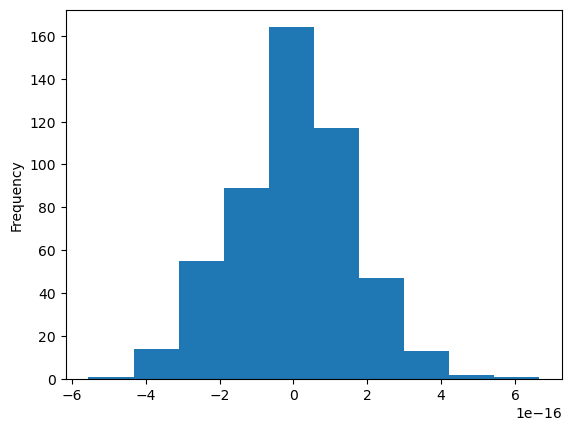

In [117]:
error_.plot.hist()

# Keresztmetszeti regresszió

In [231]:
datafr=matrix.copy()

In [233]:
Mom=momentum.T
Div=DivYield.T
Val=Value.T
Siz=Size.T
TrA=trad_act.T
Lev=Leverage.T
Pro=Profitability.T
EaV=EarVariability.T
Vol=error.T
ri=r_i.T

In [260]:
coeff = pd.DataFrame(index=['Const', 'Momentum', 'DivYield', 'Value', 'Size', 'Trading Activity', 'Leverage', 'Profitability', 
                              'Earnings Variability', 'Volatility','Energy','Materials', 'Industrials', 
                              'Consumer Discretionary', 'Consumer Staples', 'Health Care', 'Financials', 'Information Technology',
                              'Communication Services', 'Utilities', 'Real Estate'], columns=ri.columns)
p = pd.DataFrame(index=['Const', 'Momentum', 'DivYield', 'Value', 'Size', 'Trading Activity', 'Leverage', 'Profitability', 
                              'Earnings Variability', 'Volatility','Energy','Materials', 'Industrials', 
                              'Consumer Discretionary', 'Consumer Staples', 'Health Care', 'Financials', 'Information Technology',
                              'Communication Services', 'Utilities', 'Real Estate'], columns=ri.columns)
R = pd.DataFrame(index=['R^2'], columns=ri.columns)
R_adj = pd.DataFrame(index=['Adj R^2'], columns=ri.columns)
F = pd.DataFrame(index=['F'], columns=ri.columns)

for stock in ri.columns:
        
    X = sm.add_constant(pd.concat([Mom[stock], Div[stock], Val[stock], Siz[stock], TrA[stock], Lev[stock],
                                    Pro[stock], EaV[stock], Vol[stock], datafr], axis=1)) 
    
    y = ri[stock]
    model = sm.OLS(y, X)
    results = model.fit()
    coeff[stock] = results.params.values.round(3)
    p[stock]=results.pvalues.values.round(3)
    R[stock]=results.rsquared.round(3)
    
    n = len(y)
    k = len(X.columns) - 1         #-1 a const miatt
    adjusted_r_squared = 1 - ((1 - results.rsquared) * (n - 1) / (n - k - 1))
    R_adj[stock] = adjusted_r_squared.round(3)
    
    F[stock]=results.fvalue.round(2)

In [269]:
#együtthatók
coeff

Dates,2023-01-03,2023-01-04,2023-01-05,2023-01-06,2023-01-09,2023-01-10,2023-01-11,2023-01-12,2023-01-13,2023-01-17,...,2023-12-18,2023-12-19,2023-12-20,2023-12-21,2023-12-22,2023-12-26,2023-12-27,2023-12-28,2023-12-29,2024-01-02
Const,-0.002,0.008,-0.015,0.011,0.002,-0.004,0.012,-0.011,0.002,-0.006,...,0.009,-0.011,0.000,0.001,0.011,0.003,0.002,0.010,0.004,-0.011
Momentum,-0.013,-0.025,0.013,-0.002,-0.021,-0.006,-0.013,-0.002,-0.002,-0.009,...,0.008,-0.017,0.004,-0.005,-0.003,-0.005,0.001,-0.001,0.005,-0.027
DivYield,0.750,-0.376,0.338,0.029,-0.178,-0.101,-0.485,0.113,-0.122,-0.054,...,-0.341,-0.233,0.016,0.040,-0.019,0.014,-0.137,0.066,0.079,0.976
Value,0.000,0.047,0.047,0.013,-0.038,0.006,-0.014,0.018,-0.050,-0.015,...,-0.051,0.014,-0.016,-0.020,-0.007,0.002,-0.009,0.002,-0.018,0.074
Size,0.002,-0.004,-0.001,0.003,-0.002,0.002,-0.000,0.002,0.001,0.000,...,0.000,0.004,-0.003,0.001,-0.003,0.000,-0.000,-0.003,-0.001,0.001
Trading Activity,-0.013,0.014,0.011,0.003,0.005,0.009,0.000,0.012,0.004,0.004,...,-0.002,0.010,-0.012,0.013,-0.004,0.003,-0.002,-0.002,-0.009,-0.013
Leverage,-0.021,0.000,0.000,-0.000,-0.000,-0.000,0.000,0.000,-0.000,-0.000,...,0.000,-0.000,-0.000,-0.000,0.000,0.362,-0.000,-0.000,0.011,0.001
Profitability,0.025,0.000,-0.000,-0.000,-0.000,-0.000,0.000,-0.000,0.000,0.000,...,-0.000,-0.000,-0.000,0.000,-0.000,-0.472,-0.000,-0.000,0.008,-0.001
Earnings Variability,-0.078,-0.093,-0.021,0.005,0.035,-0.003,0.028,0.036,0.024,0.035,...,-0.024,0.032,-0.033,0.024,0.038,0.002,0.046,-0.040,0.009,0.098
Volatility,0.000,0.000,-0.000,0.000,-0.000,-0.000,-0.000,0.000,0.000,0.000,...,0.000,-0.000,-0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [272]:
#p-érték
p

Dates,2023-01-03,2023-01-04,2023-01-05,2023-01-06,2023-01-09,2023-01-10,2023-01-11,2023-01-12,2023-01-13,2023-01-17,...,2023-12-18,2023-12-19,2023-12-20,2023-12-21,2023-12-22,2023-12-26,2023-12-27,2023-12-28,2023-12-29,2024-01-02
Const,0.632,0.127,0.005,0.023,0.757,0.414,0.008,0.015,0.619,0.191,...,0.180,0.064,0.948,0.853,0.102,0.484,0.474,0.002,0.160,0.000
Momentum,0.000,0.000,0.000,0.328,0.000,0.003,0.000,0.251,0.289,0.000,...,0.001,0.000,0.063,0.023,0.225,0.001,0.502,0.510,0.000,0.000
DivYield,0.000,0.005,0.014,0.820,0.187,0.396,0.000,0.357,0.189,0.644,...,0.012,0.057,0.904,0.769,0.895,0.876,0.045,0.311,0.235,0.000
Value,0.987,0.002,0.002,0.361,0.010,0.645,0.291,0.191,0.000,0.237,...,0.000,0.191,0.166,0.088,0.572,0.762,0.108,0.759,0.001,0.000
Size,0.104,0.042,0.737,0.117,0.351,0.296,0.876,0.150,0.652,0.868,...,0.991,0.020,0.196,0.702,0.246,0.869,0.894,0.005,0.386,0.031
Trading Activity,0.000,0.000,0.000,0.201,0.058,0.000,0.906,0.000,0.029,0.084,...,0.292,0.000,0.000,0.000,0.148,0.066,0.172,0.069,0.000,0.000
Leverage,0.115,0.004,0.014,0.889,0.402,0.412,0.000,0.385,0.198,0.894,...,0.024,0.072,0.864,0.767,0.902,0.563,0.031,0.854,0.288,0.813
Profitability,0.506,0.004,0.035,0.812,0.178,0.446,0.000,0.323,0.178,0.566,...,0.011,0.058,0.897,0.729,0.840,0.591,0.045,0.317,0.521,0.839
Earnings Variability,0.006,0.002,0.529,0.874,0.282,0.928,0.339,0.205,0.269,0.200,...,0.494,0.297,0.339,0.476,0.300,0.924,0.008,0.014,0.579,0.028
Volatility,0.000,0.003,0.016,0.924,0.182,0.396,0.000,0.186,0.180,0.640,...,0.013,0.087,0.925,0.642,0.508,0.577,0.040,0.247,0.241,0.000


In [278]:
#R^2
R

Dates,2023-01-03,2023-01-04,2023-01-05,2023-01-06,2023-01-09,2023-01-10,2023-01-11,2023-01-12,2023-01-13,2023-01-17,...,2023-12-18,2023-12-19,2023-12-20,2023-12-21,2023-12-22,2023-12-26,2023-12-27,2023-12-28,2023-12-29,2024-01-02
R^2,0.355,0.406,0.319,0.202,0.304,0.164,0.31,0.262,0.177,0.14,...,0.179,0.254,0.146,0.23,0.081,0.143,0.172,0.413,0.398,0.62


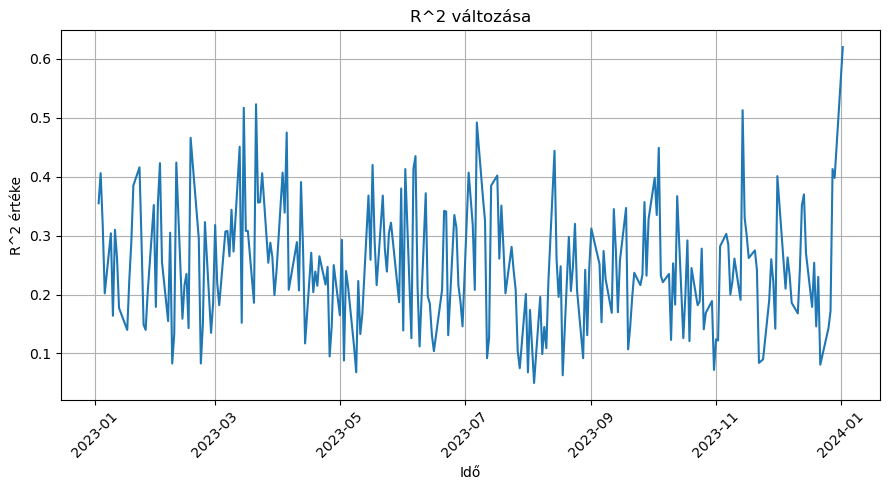

In [259]:
R_=R.T
plt.figure(figsize=(9, 5))
plt.title('R^2 változása')
plt.plot(R_, linestyle='-')
plt.xlabel('Idő')         # X tengely címkéje
plt.ylabel('R^2 értéke')    # Y tengely címkéje
plt.xticks(rotation=45)     # X tengely címkéinek elforgatása
plt.grid(True)              # Rács megjelenítése
plt.tight_layout()  

plt.show()

In [279]:
#Korrigált R^2
R_adj

Dates,2023-01-03,2023-01-04,2023-01-05,2023-01-06,2023-01-09,2023-01-10,2023-01-11,2023-01-12,2023-01-13,2023-01-17,...,2023-12-18,2023-12-19,2023-12-20,2023-12-21,2023-12-22,2023-12-26,2023-12-27,2023-12-28,2023-12-29,2024-01-02
Adj R^2,0.329,0.381,0.29,0.169,0.275,0.13,0.281,0.232,0.143,0.104,...,0.145,0.223,0.11,0.198,0.043,0.108,0.137,0.389,0.373,0.605


In [282]:
#F-statisztika
F

Dates,2023-01-03,2023-01-04,2023-01-05,2023-01-06,2023-01-09,2023-01-10,2023-01-11,2023-01-12,2023-01-13,2023-01-17,...,2023-12-18,2023-12-19,2023-12-20,2023-12-21,2023-12-22,2023-12-26,2023-12-27,2023-12-28,2023-12-29,2024-01-02
F,14.83,20.74,14.21,7.68,13.29,5.97,13.62,10.8,6.55,4.94,...,6.64,10.34,5.18,9.07,2.67,4.5,6.3,21.39,17.8,43.95
